<a href="https://colab.research.google.com/github/handikamsf/data-wrangling/blob/main/Scaling%2C_Transforming%2C_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling A**

**Kelompok:** 7

---

**Nama (NPM):**

Saif Ali Zaky A. (24083010004)

M. Handika M. S. (24083010036)

Rizky Faza H. N. (24083010099)

Indra Maulana R. F. Y. (24083010105)

Yafi Rafsanjani H. (24083010122)


---


**Dosen Pengampu:**

Andri Fauzan Adziima, M.Si.

Kartika Maulida Hindrayani, S.Kom., M.Kom

# **Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from scipy import stats

## Melihat struktur data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/SEMESTER 2/DW/diabetes.csv')

print("Informasi dataset:")
print(df.info())
df.head()

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Melihat statistik deskriptif

In [ ]:
print("Statistik deskriptif:")
df.describe()

Statistik deskriptif:


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Mengecek nilai yang hilang

In [ ]:
print("Jumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang per kolom:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Visualisasi distribusi data awal

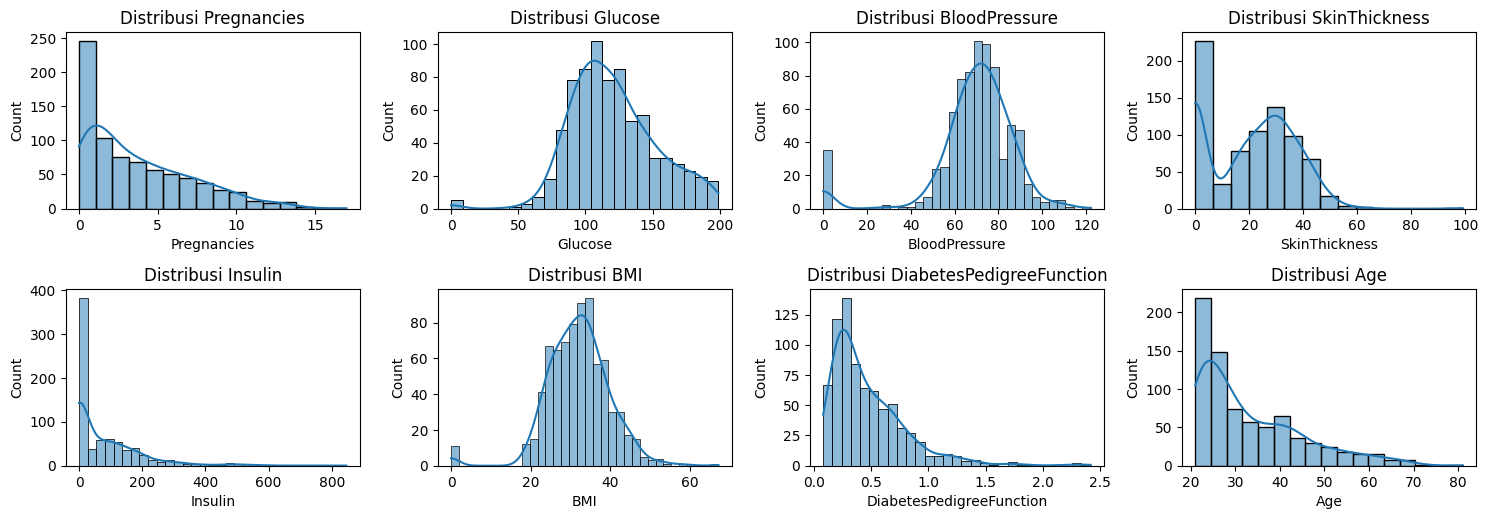

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Menyimpan kolom numerik
numeric_features = df.columns[:-1]

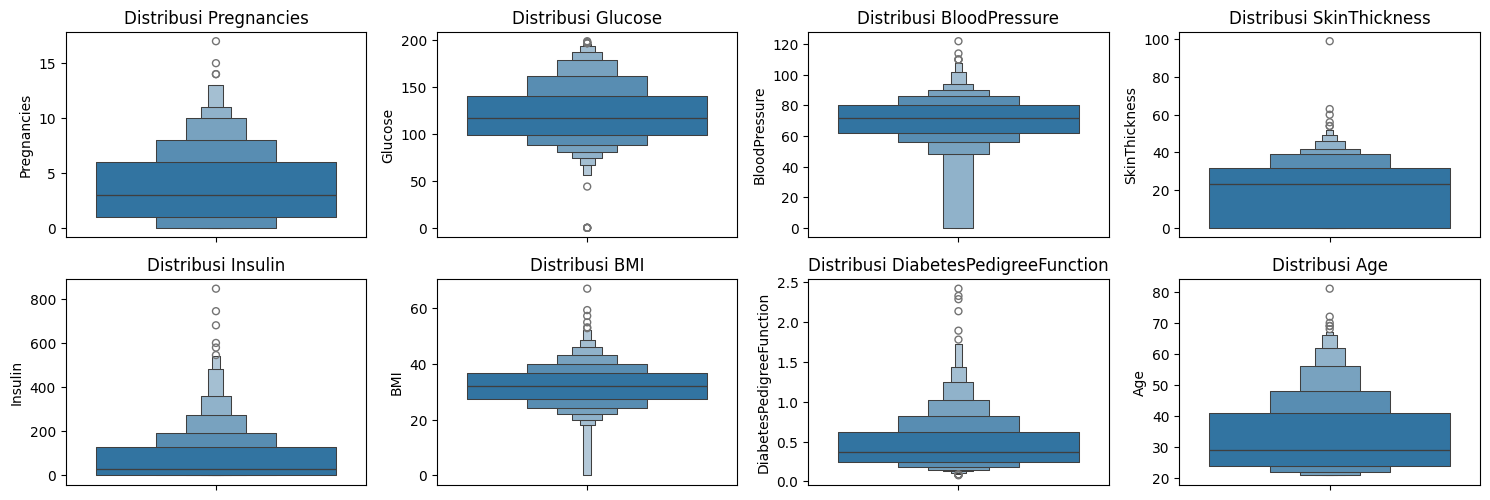

In [ ]:
# Visualisasi boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.boxenplot(df[col])
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Ganti nilai yang diluar IQR dengan nilai median
def cap_outliers_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].median()

    return df

In [ ]:
for col in numeric_features:
    df = cap_outliers_median(df, col)

df

<ipython-input-39-e3fbe6039781>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].median()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35      0.0  33.6   
1              1       85             66             29      0.0  26.6   
2              8      183             64              0      0.0  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27      0.0  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60              0      0.0  30.1   
767            1       93             70             31      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                      0.6270   50        1  
1                      0.3510   31        0  
2                      0.6720   32        1  
3                      0.1670   21        0  
4                      0.3725   33        1  
..                        ...  ...      ...  
763                    0.1710   63        0  
764                    0.3400   27        0  
765                    0.2450   30        0  
766                    0.3490   47        1  
767                    0.3150   23        0  

[768 rows x 9 columns]

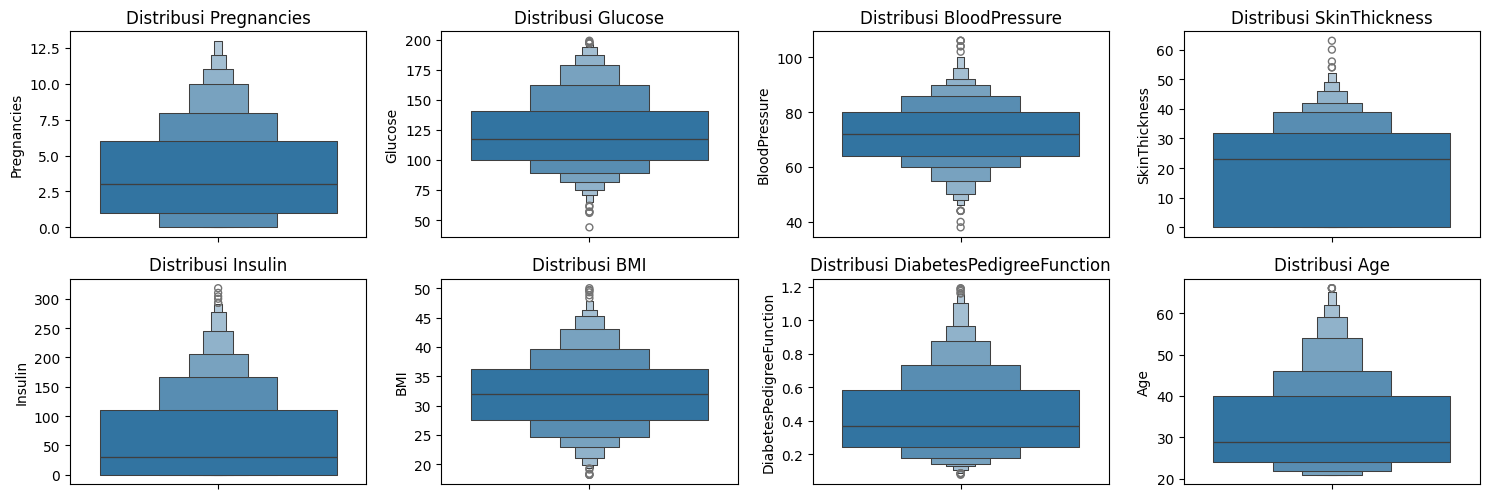

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.boxenplot(df[col])
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# **Scaling**

## StandardScaler

StandardScaler adalah teknik standardisasi yang digunakan untuk mengubah data sehingga memiliki mean 0 dan standard deviation (SD) 1. Terlihat sama dengan menghitung nilai z-score.

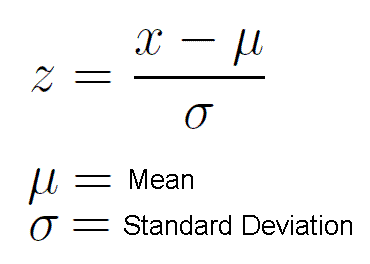

Dimana:
- x = nilai asli
- mean = rata-rata setiap kolom
- sd = standar deviasi setiap kolom

Mean menjadi 0 karena semua nilai dikurangi dengan mean asli

Standar deviasi menjadi 1 karena semua nilai dibagi dengan standar deviasi asli

Sehingga rentang nilai yang muncul nanti memiliki mean 0 dan standar deviasi 1

In [ ]:
# 1. StandardScaler
def apply_standard_scaler(data, features):
    # Membuat copy dari data asli
    df_scaled = data.copy()

    # Membuat objek StandardScaler
    scaler = StandardScaler()

    # Melakukan fit dan transform pada fitur numerik
    df_scaled[features] = scaler.fit_transform(data[features])

    return df_scaled

    # Visualisasi hasil transformasi
def visualize_standard_scaler(data_original, data_scaled, features):
    plt.figure(figsize=(15, 20))
    for i, feature in enumerate(features):
        # Histogram untuk distribusi asli
        plt.subplot(len(features), 2, 2 * i + 1)
        sns.histplot(data_original[feature], kde=True, color='blue', label='Original')
        plt.title(f'Distribusi Asli: {feature}')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Jumlah')

        # Histogram untuk distribusi setelah StandardScaler
        plt.subplot(len(features), 2, 2 * i + 2)
        sns.histplot(data_scaled[feature], kde=True, color='green', label='Standard Scaled')
        plt.title(f'Distribusi Setelah StandardScaler: {feature}')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Jumlah')

    plt.tight_layout()
    plt.show()

### Menampilkan beberapa baris data setelah scaling

In [ ]:
# Memanggil fungsi standardscaler
df_standard = apply_standard_scaler(df, numeric_features)

# Menampilkan beberapa baris data setelah scaling
print("Hasil StandardScaler:")
df_standard.head()

Hasil StandardScaler:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.678427  0.866045      -0.017650       0.928238 -0.785193  0.218695   
1    -0.851320 -1.205066      -0.556276       0.545788 -0.785193 -0.873966   
2     1.290326  2.016662      -0.735818      -1.302720 -0.785193 -1.389077   
3    -0.851320 -1.073567      -0.556276       0.163338  0.426380 -0.639824   
4    -1.157270  0.504422      -2.890320       0.928238  1.380171  1.701591   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.813594  1.560400        1  
1                 -0.312924 -0.159340        0  
2                  0.997265 -0.068827        1  
3                 -1.063936 -1.064466        0  
4                 -0.225170  0.021685        1

In [ ]:
# Statistik deskriptif setelah scaling
print("Statistik deskriptif setelah StandardScaler:")
df_standard[numeric_features].describe()

Statistik deskriptif setelah StandardScaler:


Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.013708e-17  4.625929e-18   4.209596e-16  -8.095376e-18 -6.938894e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.157270e+00 -2.552931e+00  -3.069862e+00  -1.302720e+00 -7.851929e-01   
25%   -8.513202e-01 -7.201630e-01  -7.358177e-01  -1.302720e+00 -7.851929e-01   
50%   -2.394213e-01 -1.530732e-01  -1.765027e-02   1.633380e-01 -4.017430e-01   
75%    6.784269e-01  6.112653e-01   7.005172e-01   7.370128e-01  6.326050e-01   
max    2.820073e+00  2.542658e+00   3.034561e+00   2.713004e+00  3.313532e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  7.680000e+02              7.680000e+02  7.680000e+02  
mean  -6.129356e-16              2.613650e-16  2.035409e-16  
std    1.000652e+00              1.000652e+00  1.000652e+00  
min   -2.185158e+00             -1.427198e+00 -1.064466e+00  
25%   -7.334807e-01             -7.506746e-01 -7.929281e-01  
50%   -3.105627e-02             -2.282314e-01 -3.403651e-01  
75%    6.401493e-01              6.309427e-01  6.552735e-01  
max    2.778641e+00              3.115609e+00  3.008601e+00

### Visualisasi hasil

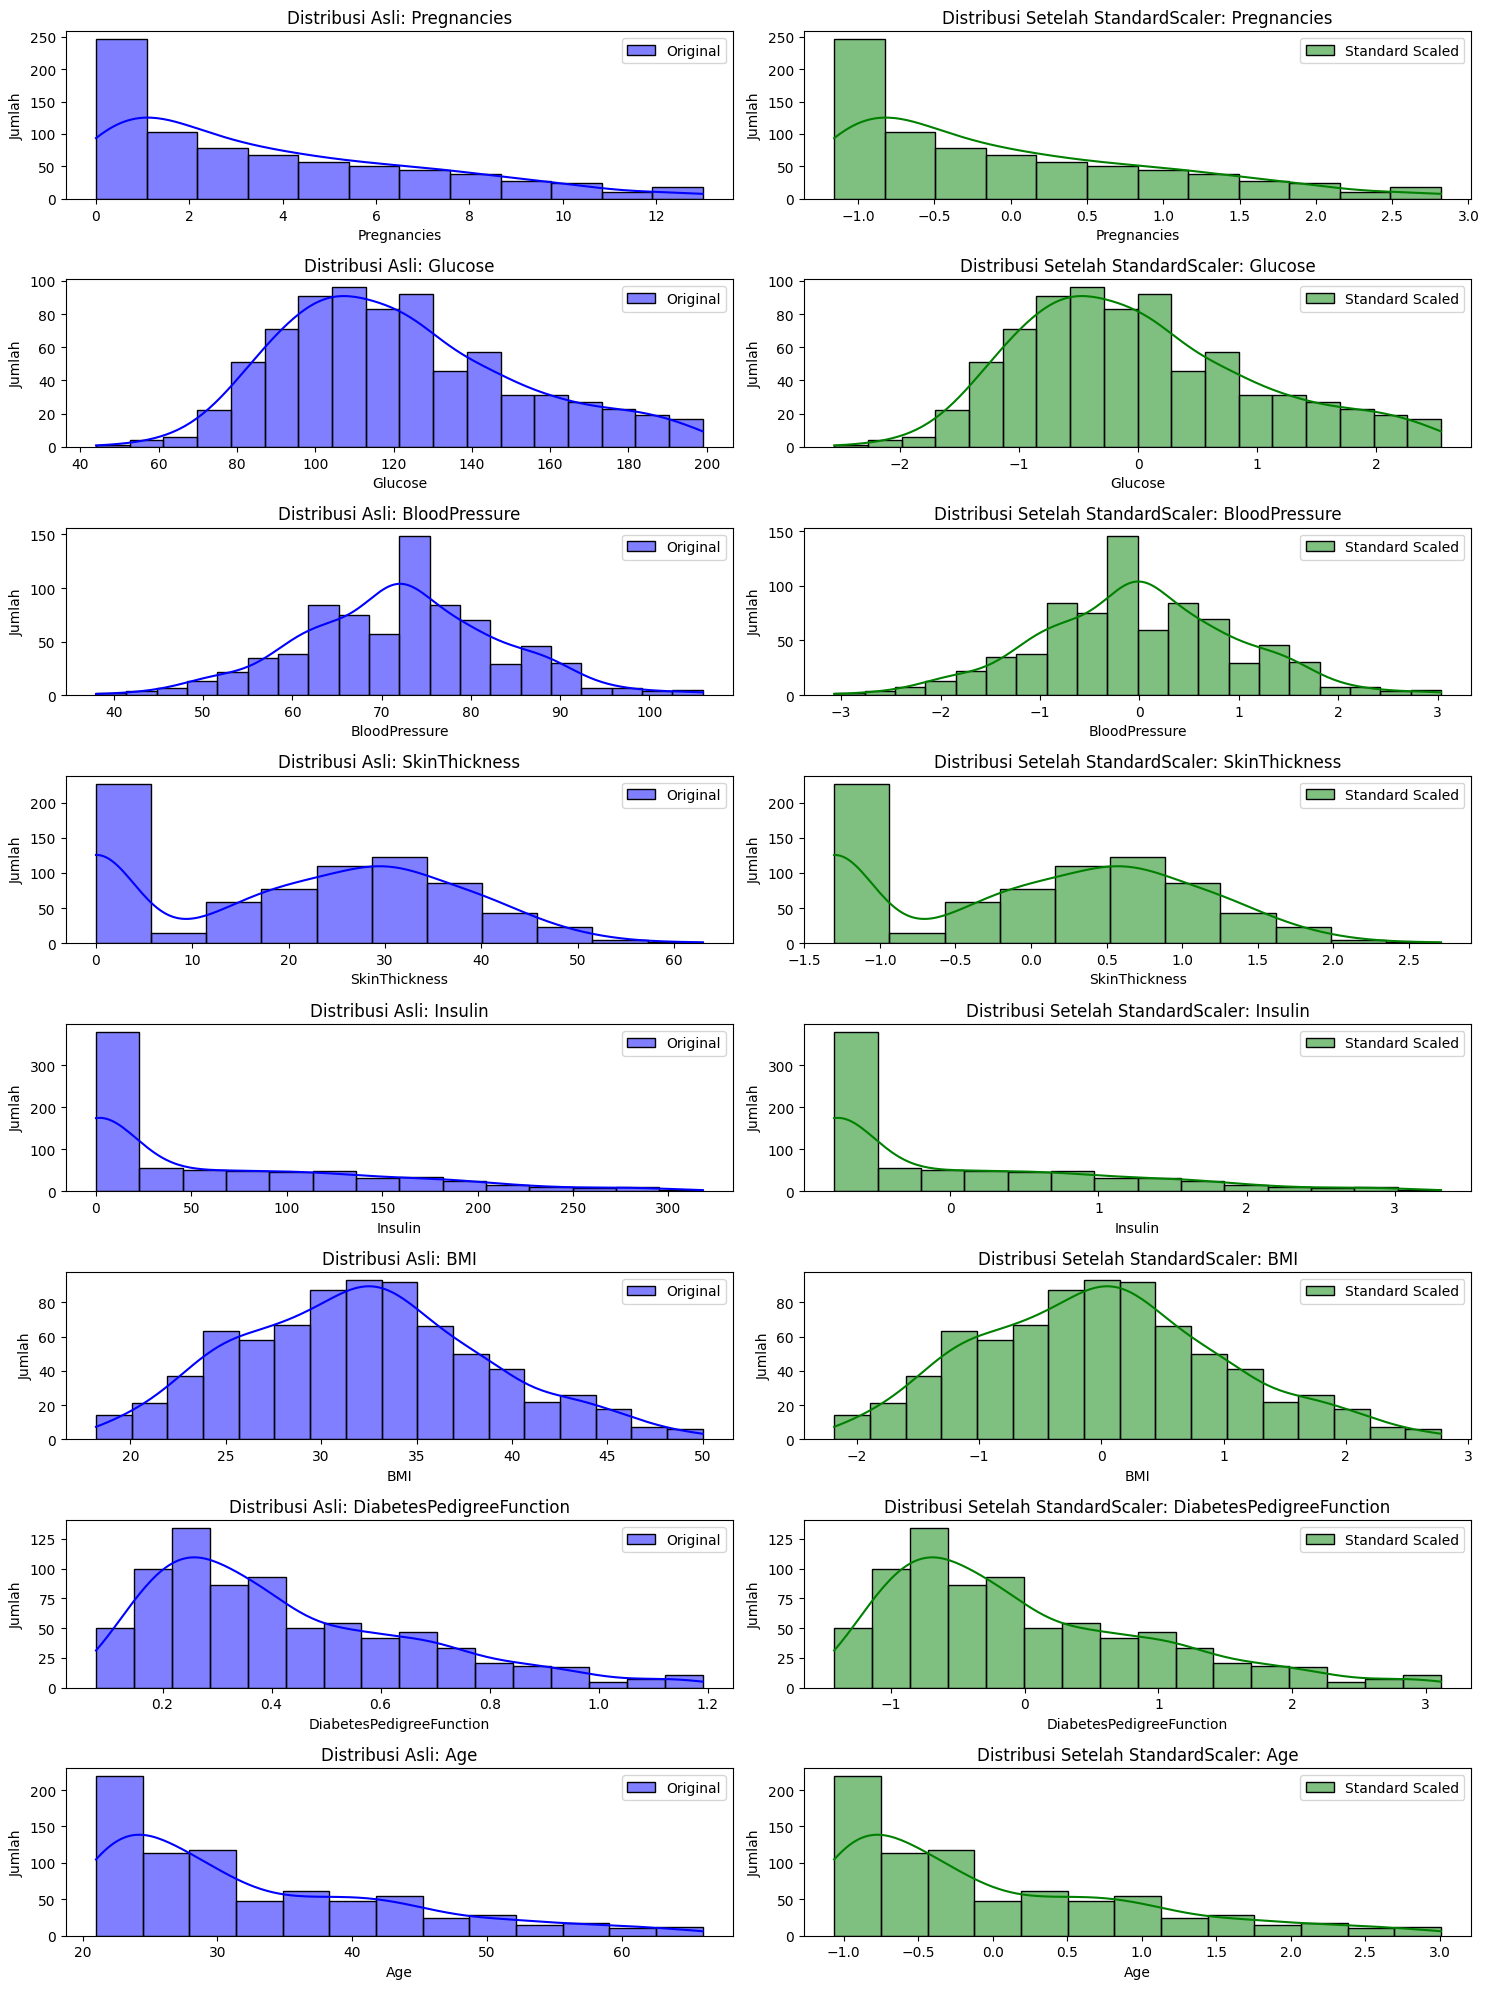

In [ ]:
# Memanggil fungsi visualisasi
visualize_standard_scaler(df[numeric_features], df_standard[numeric_features], numeric_features)

## MinMaxScaler
MinMaxScaler adalah metode normalisasi yang menskalakan data ke dalam rentang tertentu, biasanya antara 0 dan 1.

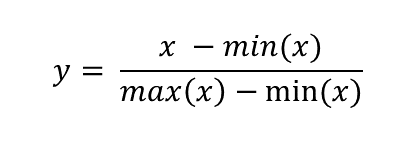

Dimana:
- x = nilai asli fitur tersebut
- x min = nilai minimum fitur tersebut
- x max = nilai maksimum fitur tersebut

MinMaxScaler mempertahankan hubungan proporsional antara nilai dalam dataset tanpa mengubah distribusi data.

In [ ]:
# 2. MinMaxScaler
def apply_minmax_scaler(data, features, feature_range=(0,1)):
    # Membuat copy dari data asli
    df_scaled = data.copy()

    # Membuat objek MinMaxScaler
    scaler = MinMaxScaler(feature_range=feature_range)

    # Melakukan fit dan transform pada fitur numerik
    df_scaled[features] = scaler.fit_transform(data[features])

    return df_scaled

def visualize_minmax_scaler(data_original, data_scaled, features):
    plt.figure(figsize=(15, 20))
    for i, feature in enumerate(features):
        plt.subplot(len(features), 2, 2 * i + 1)
        sns.histplot(data_original[feature], kde=True, color='blue', label='Original')
        plt.title(f'Distribusi Asli: {feature}')
        plt.legend()

        plt.subplot(len(features), 2, 2 * i + 2)
        sns.histplot(data_scaled[feature], kde=True, color='green', label='Min-Max Scaled')
        plt.title(f'Distribusi Setelah MinMaxScaler: {feature}')
        plt.legend()

    plt.tight_layout()
    plt.show()

### Menampilkan beberapa baris data setelah scaling


In [ ]:
# Memanggil fungsi minmaxscaler
df_minmax = apply_minmax_scaler(df, numeric_features)

# Menampilkan beberapa baris data setelah scaling
print("Hasil MinMaxScaler:")
df_minmax.head()

Hasil MinMaxScaler:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.461538  0.670968       0.500000       0.555556  0.000000  0.484277   
1     0.076923  0.264516       0.411765       0.460317  0.000000  0.264151   
2     0.615385  0.896774       0.382353       0.000000  0.000000  0.160377   
3     0.076923  0.290323       0.411765       0.365079  0.295597  0.311321   
4     0.000000  0.600000       0.029412       0.555556  0.528302  0.783019   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.493261  0.644444        1  
1                  0.245283  0.222222        0  
2                  0.533693  0.244444        1  
3                  0.079964  0.000000        0  
4                  0.264600  0.266667        1

In [ ]:
# Statistik deskriptif setelah scaling
print("Statistik deskriptif setelah MinMaxScaler:")
df_minmax[numeric_features].describe()

Statistik deskriptif setelah MinMaxScaler:


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.290966    0.501008       0.502891       0.324405    0.191570   
std       0.251588    0.196376       0.163922       0.249183    0.244137   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.076923    0.359677       0.382353       0.000000    0.000000   
50%       0.230769    0.470968       0.500000       0.365079    0.093553   
75%       0.461538    0.620968       0.617647       0.507937    0.345912   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean     0.440219                  0.314167    0.261343  
std      0.201590                  0.220272    0.245675  
min      0.000000                  0.000000    0.000000  
25%      0.292453                  0.148922    0.066667  
50%      0.433962                  0.263926    0.177778  
75%      0.569182                  0.453055    0.422222  
max      1.000000                  1.000000    1.000000

### Visualisasi

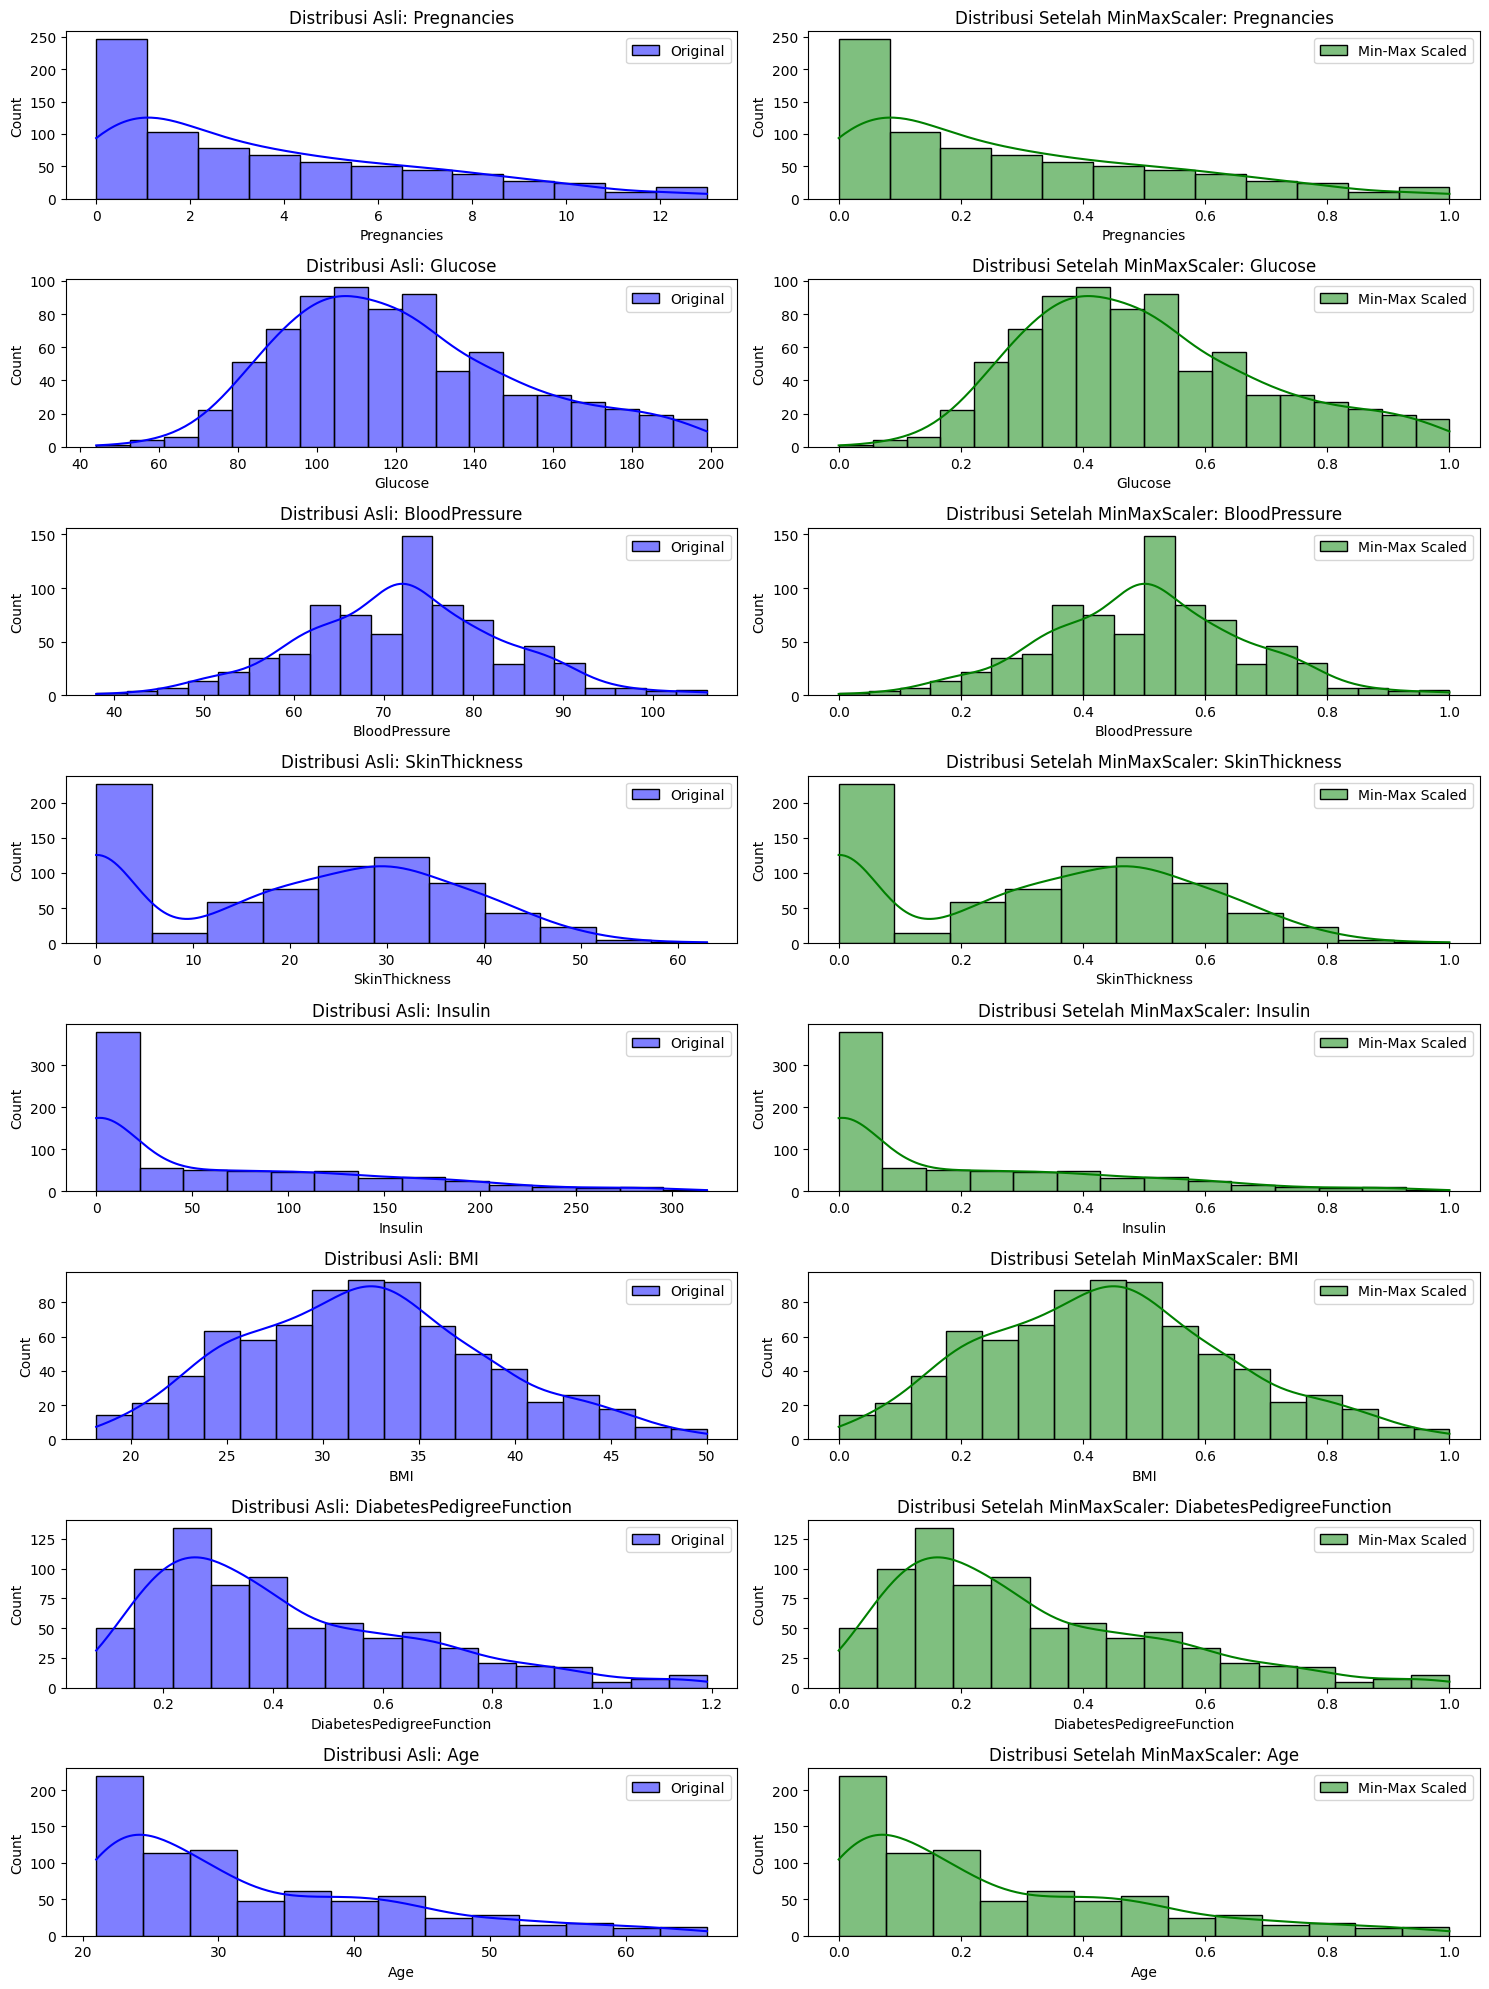

In [ ]:
# Memanggil fungsi visualisasi
visualize_minmax_scaler(df[numeric_features], df_minmax[numeric_features], numeric_features)

## RobustScaler
RobustScaler adalah metode normalisasi yang tidak terpengaruh oleh outlier karena menggunakan median dan interquartile range (IQR), bukan mean dan standard deviation seperti StandardScaler.

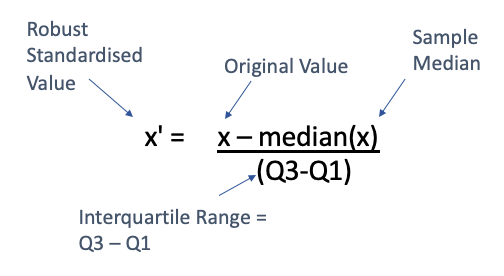

Dimana:
- x = nilai asli dari fitur
- median = nilai tengah fitur
- Q3 - Q1 (IQR) = nilai jarak interquartil fitur

Nilai setelah transformasi tidak memiliki rentang tetap (bisa -1 sampai 1 atau lebih besar), tetapi tetap skala yang lebih stabil meskipun ada outlier.

In [ ]:
# 3. RobustScaler
def apply_robust_scaler(data, features):
    # Membuat copy dari data asli
    df_scaled = data.copy()

    # Membuat objek RobustScaler
    scaler = RobustScaler()

    # Melakukan fit dan transform pada fitur numerik
    df_scaled[features] = scaler.fit_transform(data[features])

    return df_scaled

    # Visualisasi hasil transformasi
def visualize_robust_scaler(data_original, data_scaled, features):
    plt.figure(figsize=(15, 20))
    for i, feature in enumerate(features):
        # Histogram untuk distribusi asli
        plt.subplot(len(features), 2, 2 * i + 1)
        sns.histplot(data_original[feature], kde=True, color='blue', label='Original')
        plt.title(f'Distribusi Asli: {feature}')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Jumlah')

        # Histogram untuk distribusi setelah RobustScaler
        plt.subplot(len(features), 2, 2 * i + 2)
        sns.histplot(data_scaled[feature], kde=True, color='green', label='Robust Scaled')
        plt.title(f'Distribusi Setelah RobustScaler: {feature}')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Jumlah')

    plt.tight_layout()
    plt.show()

### Menampilkan beberapa baris data setelah scaling

In [ ]:
# Memanggil fungsi robustscaler
df_robust = apply_robust_scaler(df, numeric_features)

# Menampilkan beberapa baris data setelah scaling
print("Hasil RobustScaler:")
df_robust.head()

Hasil RobustScaler:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.765432          0.000        0.37500 -0.270455  0.181818   
1         -0.4 -0.790123         -0.375        0.18750 -0.270455 -0.613636   
2          1.0  1.629630         -0.500       -0.71875 -0.270455 -0.988636   
3         -0.4 -0.691358         -0.375        0.00000  0.584091 -0.443182   
4         -0.6  0.493827         -2.000        0.37500  1.256818  1.261364   

   DiabetesPedigreeFunction     Age  Outcome  
0                  0.754062  1.3125        1  
1                 -0.061300  0.1250        0  
2                  0.887001  0.1875        1  
3                 -0.604874 -0.5000        0  
4                  0.002216  0.2500        1

In [ ]:
# Statistik deskriptif setelah scaling
print("Statistik deskriptif setelah RobustScaler:")
df_robust[numeric_features].describe()

Statistik deskriptif setelah RobustScaler:


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.156510    0.114969       0.012288      -0.080078    0.283357   
std       0.654129    0.751563       0.696670       0.490580    0.705779   
min      -0.600000   -1.802469      -2.125000      -0.718750   -0.270455   
25%      -0.400000   -0.425926      -0.500000      -0.718750   -0.270455   
50%       0.000000    0.000000       0.000000       0.000000    0.000000   
75%       0.600000    0.574074       0.500000       0.281250    0.729545   
max       2.000000    2.024691       2.125000       1.250000    2.620455   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000              7.680000e+02  768.000000  
mean     0.022609              1.651915e-01    0.235026  
std      0.728472              7.242611e-01    0.690962  
min     -1.568182             -8.677991e-01   -0.500000  
25%     -0.511364             -3.781388e-01   -0.312500  
50%      0.000000             -8.196568e-17    0.000000  
75%      0.488636              6.218612e-01    0.687500  
max      2.045455              2.420236e+00    2.312500

### Visualisasi

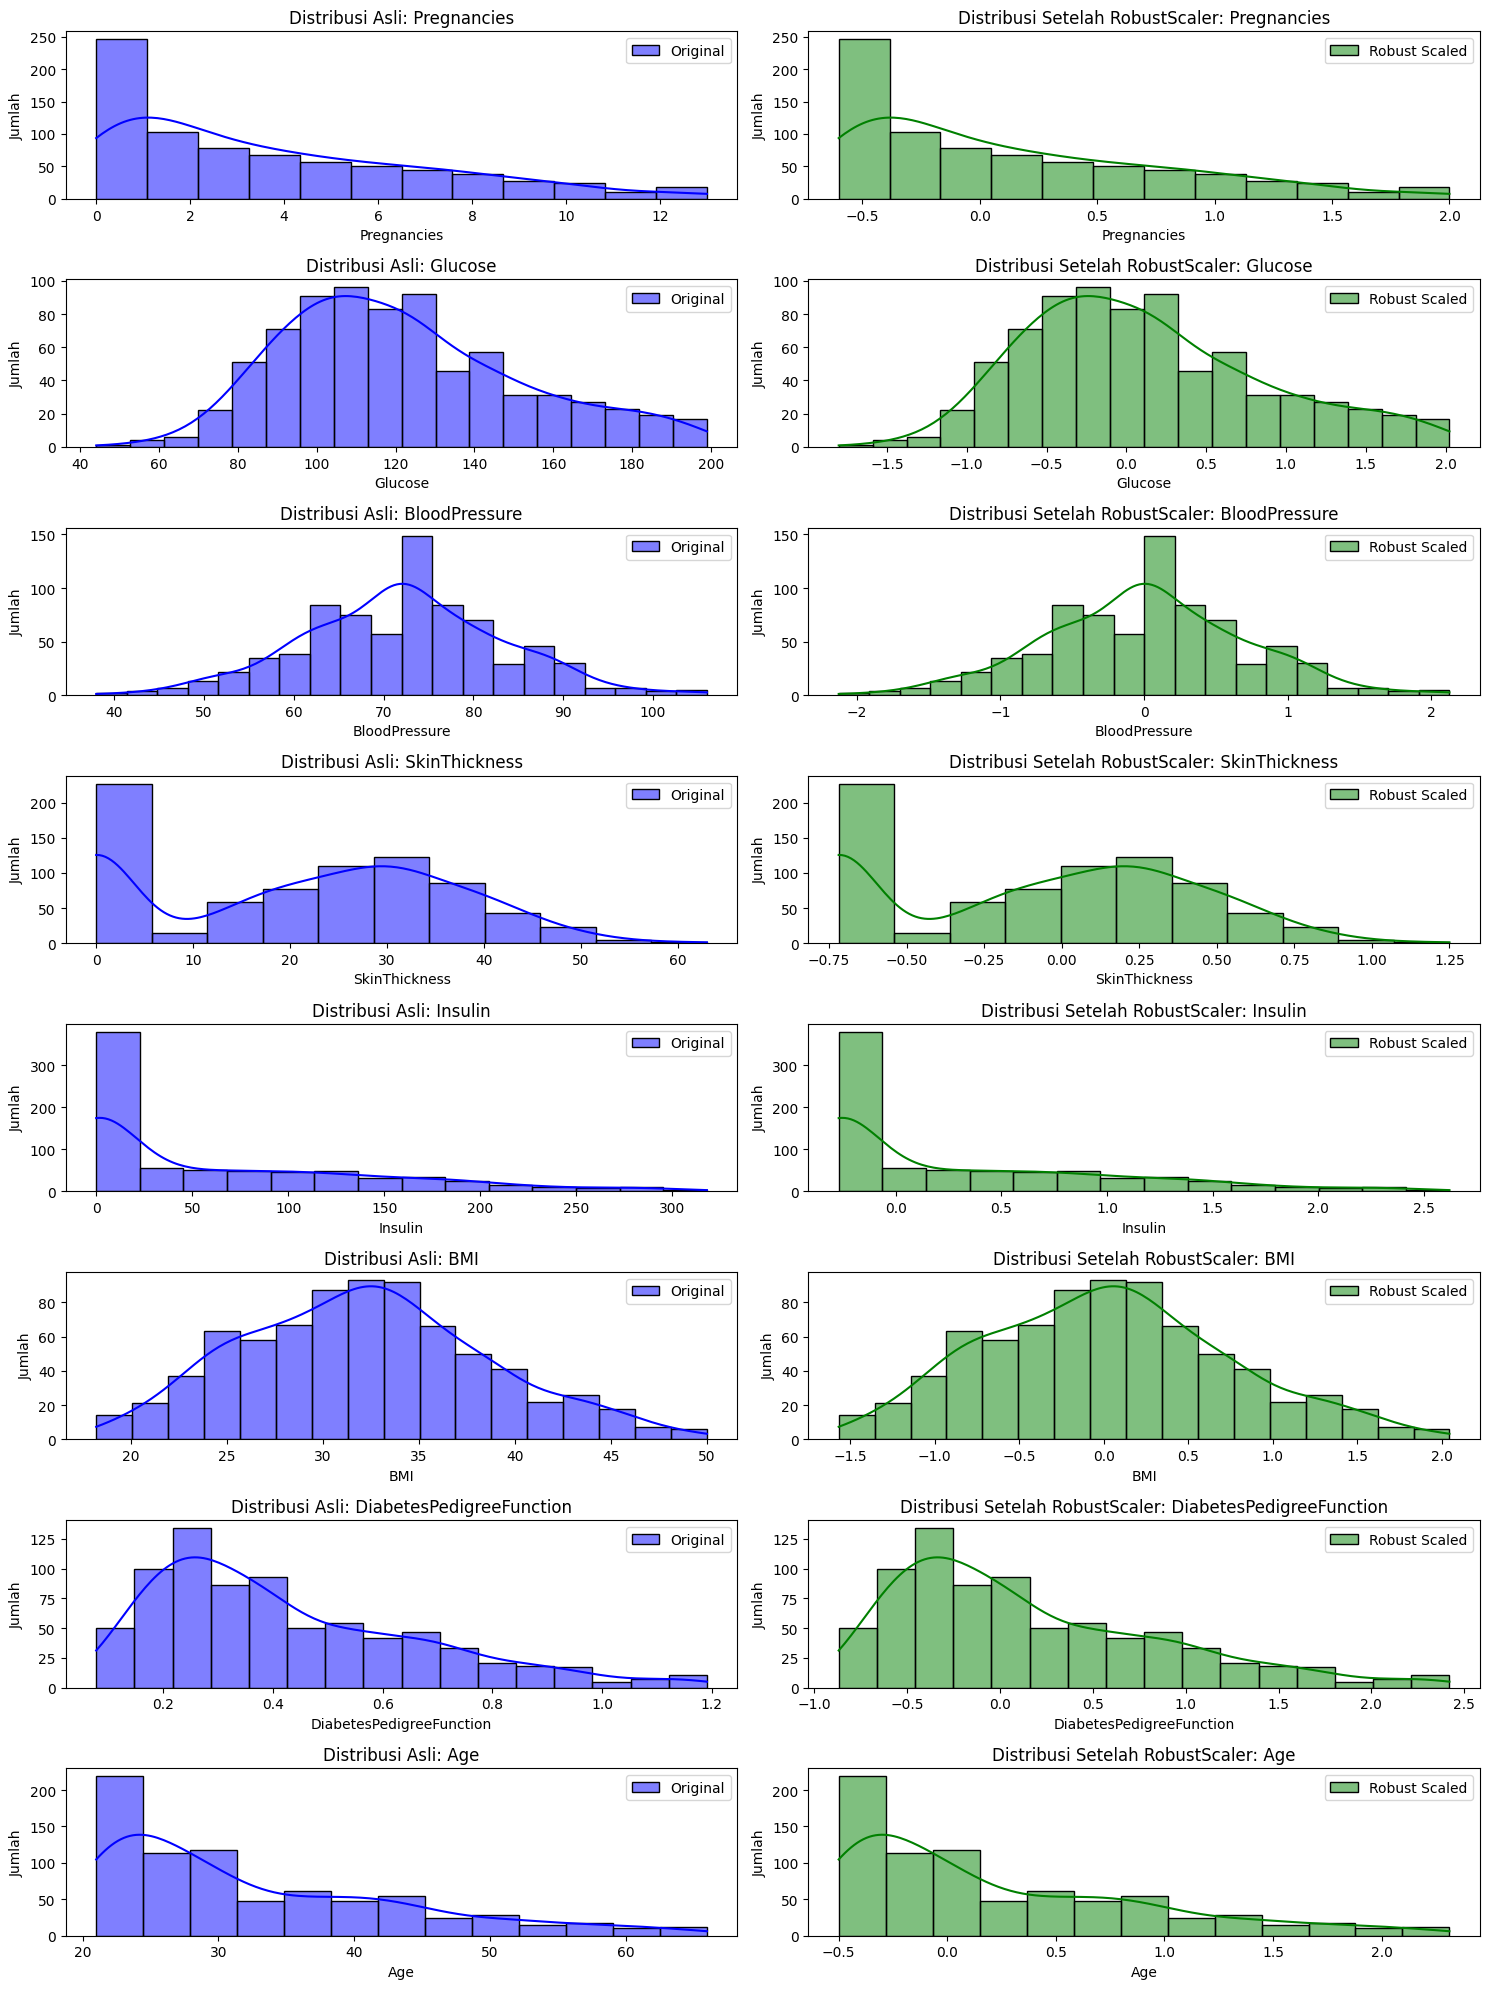

In [ ]:
visualize_robust_scaler(df[numeric_features], df_robust[numeric_features], numeric_features)

## MaxAbsScaler
MaxAbsScaler adalah teknik normalisasi yang menskalakan data berdasarkan nilai absolut maksimum dari setiap fitur.

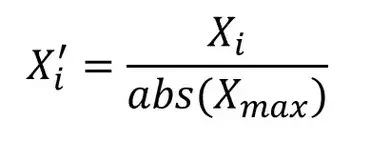

Dimana:
- x = nilai asli fitur
- abs x max = nilai absolut maksimum dari fitur
Data akan dipetakan dalam rentang -1 hingga 1, tetapi tidak mengubah distribusi data.

In [ ]:
# 4. MaxAbsScaler
def apply_maxabs_scaler(data, features):
    # Membuat copy dari data asli
    df_scaled = data.copy()

    # Membuat objek MaxAbsScaler
    scaler = MaxAbsScaler()

    # Melakukan fit dan transform pada fitur numerik
    df_scaled[features] = scaler.fit_transform(data[features])

    return df_scaled

    # Visualisasi hasil transformasi
def visualize_maxabs_scaler(data_original, data_scaled, features):
    plt.figure(figsize=(15, 20))
    for i, feature in enumerate(features):
        # Histogram untuk distribusi asli
        plt.subplot(len(features), 2, 2 * i + 1)
        sns.histplot(data_original[feature], kde=True, color='blue', label='Original')
        plt.title(f'Distribusi Asli: {feature}')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Jumlah')

        # Histogram untuk distribusi setelah MaxAbsScaler
        plt.subplot(len(features), 2, 2 * i + 2)
        sns.histplot(data_scaled[feature], kde=True, color='green', label='Max-Abs Scaled')
        plt.title(f'Distribusi Setelah MaxAbsScaler: {feature}')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Jumlah')

    plt.tight_layout()
    plt.show()

### Menampilkan beberapa baris data setelah scaling

In [ ]:
# Memanggil fungsi maxabsscaler
df_maxabs = apply_maxabs_scaler(df, numeric_features)

# Menampilkan beberapa baris data setelah scaling
print("Hasil MaxAbsScaler:")
df_maxabs.head()

Hasil MaxAbsScaler:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin    BMI  \
0     0.461538  0.743719       0.679245       0.555556  0.000000  0.672   
1     0.076923  0.427136       0.622642       0.460317  0.000000  0.532   
2     0.615385  0.919598       0.603774       0.000000  0.000000  0.466   
3     0.076923  0.447236       0.622642       0.365079  0.295597  0.562   
4     0.000000  0.688442       0.377358       0.555556  0.528302  0.862   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.526448  0.757576        1  
1                  0.294710  0.469697        0  
2                  0.564232  0.484848        1  
3                  0.140218  0.318182        0  
4                  0.312762  0.500000        1

In [ ]:
# Statistik deskriptif setelah scaling
print("Statistik deskriptif setelah MaxAbsScaler:")
df_maxabs[numeric_features].describe()

Statistik deskriptif setelah MaxAbsScaler:


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.290966    0.611338       0.681100       0.324405    0.191570   
std       0.251588    0.152956       0.105158       0.249183    0.244137   
min       0.000000    0.221106       0.358491       0.000000    0.000000   
25%       0.076923    0.501256       0.603774       0.000000    0.000000   
50%       0.230769    0.587940       0.679245       0.365079    0.093553   
75%       0.461538    0.704774       0.754717       0.507937    0.345912   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean     0.643979                  0.359083    0.496370  
std      0.128211                  0.205846    0.167506  
min      0.364000                  0.065491    0.318182  
25%      0.550000                  0.204660    0.363636  
50%      0.640000                  0.312133    0.439394  
75%      0.726000                  0.488875    0.606061  
max      1.000000                  1.000000    1.000000

### Visualisasi

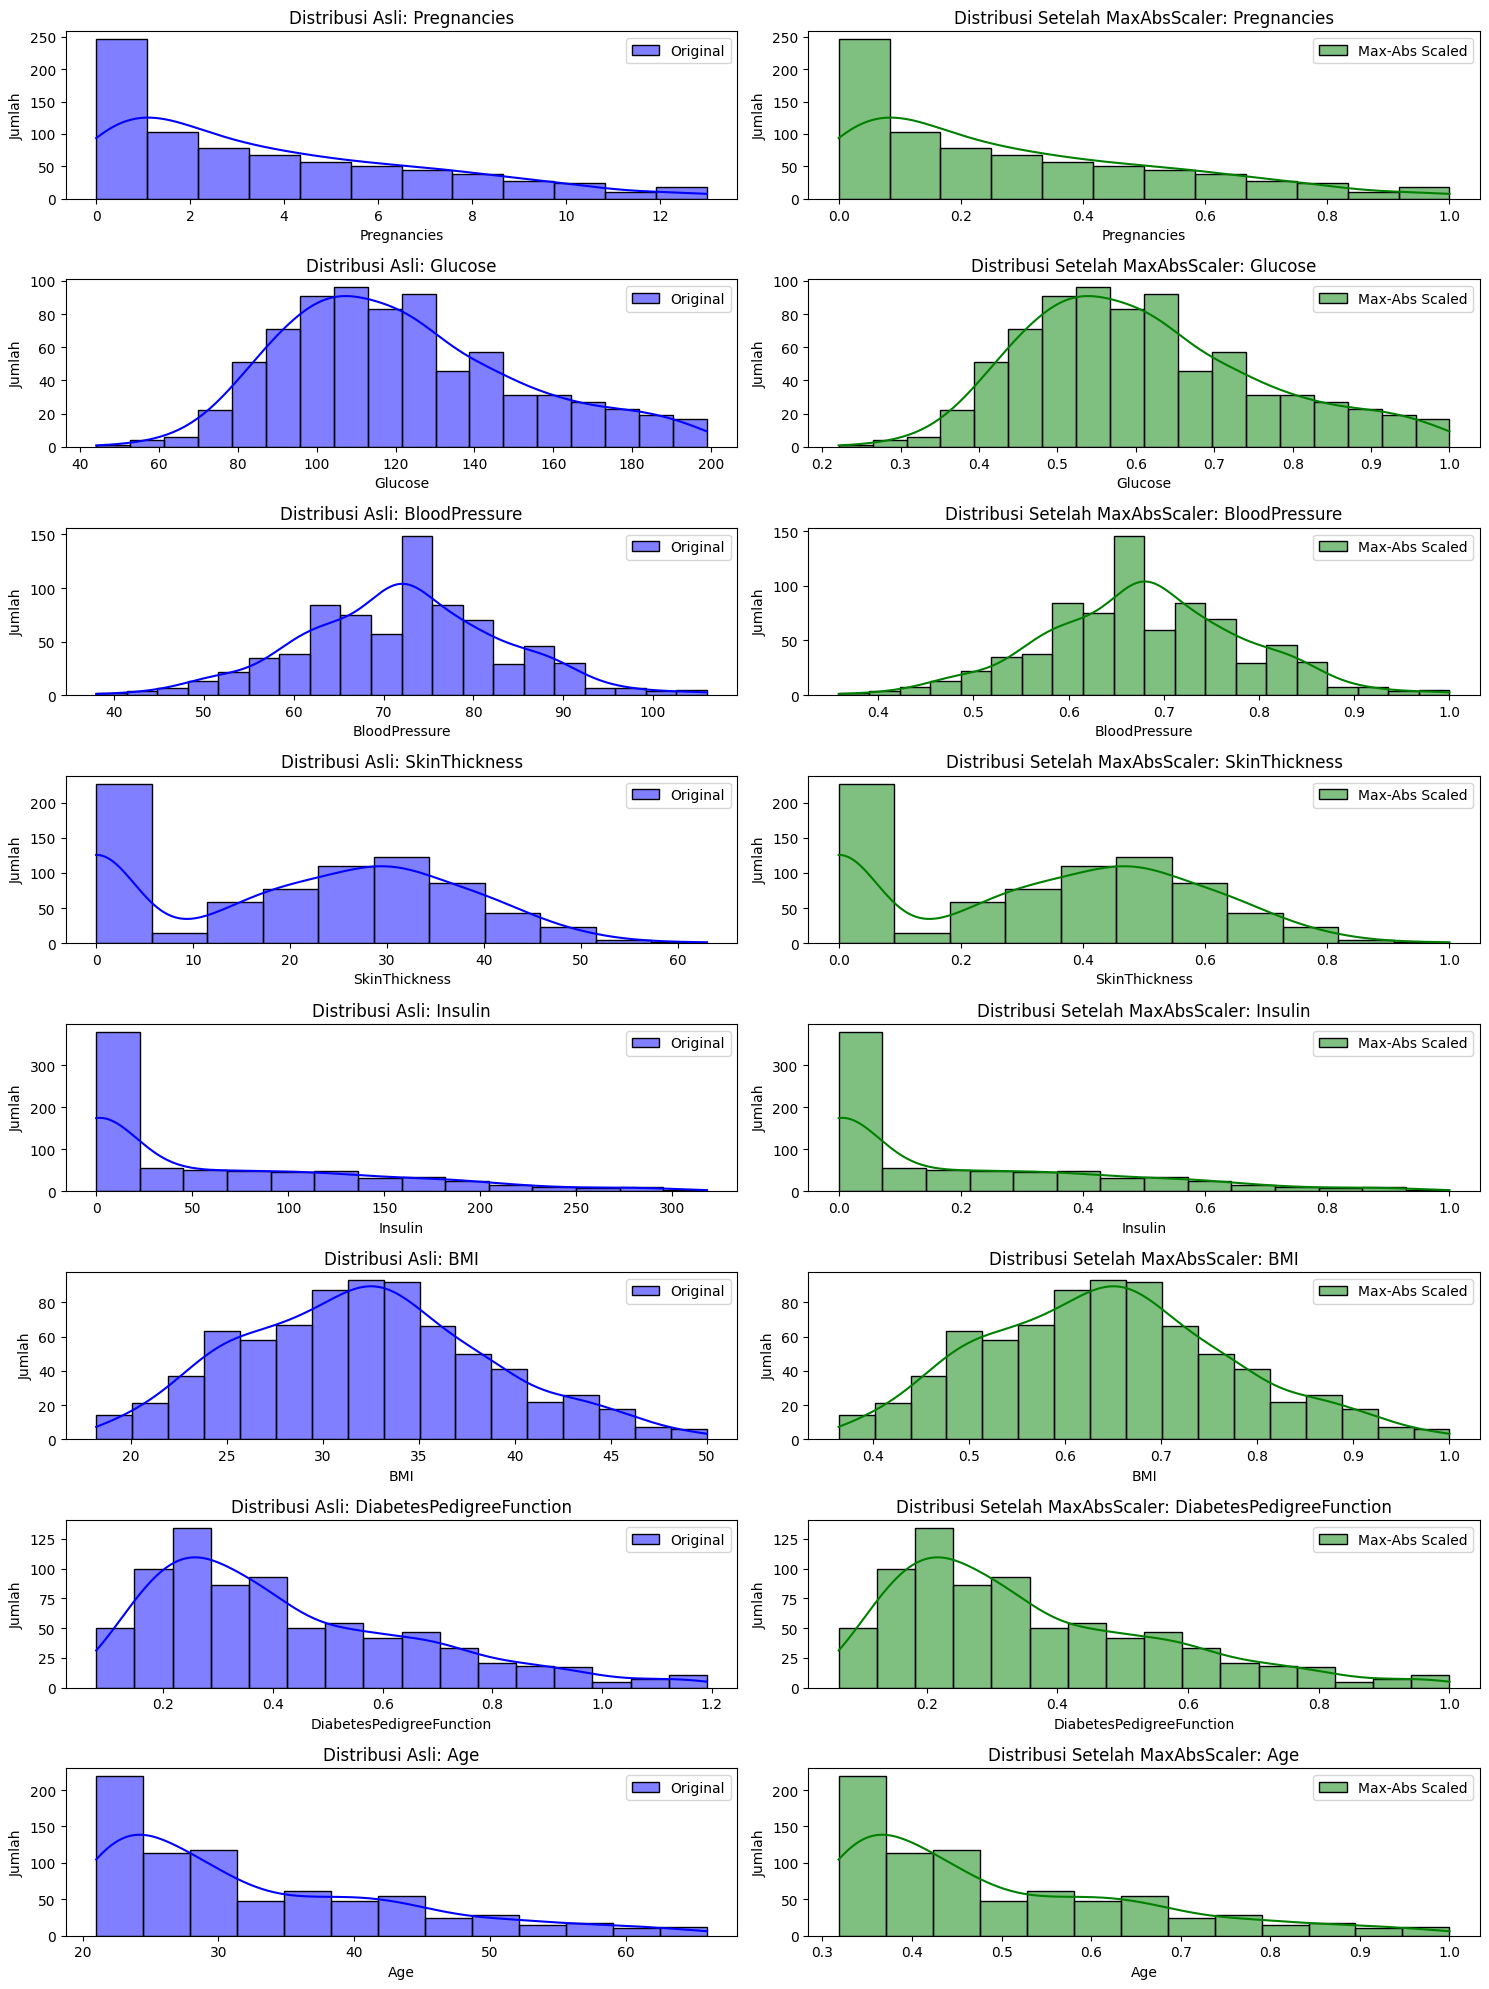

In [ ]:
# Memanggil fungsi visualisasi untuk MaxAbsScaler
visualize_maxabs_scaler(df[numeric_features], df_maxabs[numeric_features], numeric_features)

# **Transforming**

## QuantileTransformer

In [ ]:
# 5. QuantileTransformer
def apply_quantile_transformer(data, features, output_distribution='uniform'):
    # Membuat copy dari data asli
    df_scaled = data.copy()

    # Membuat objek QuantileTransformer
    scaler = QuantileTransformer(output_distribution=output_distribution, random_state=42)

    # Melakukan fit dan transform pada fitur numerik
    df_scaled[features] = scaler.fit_transform(data[features])

    return df_scaled

    # Visualisasi hasil transformasi
def visualize_quantile_transformer(data_original, data_scaled_uniform, data_scaled_normal, features):
    plt.figure(figsize=(20, 30))
    for i, feature in enumerate(features):
        # Histogram untuk distribusi asli
        plt.subplot(len(features), 3, 3 * i + 1)
        sns.histplot(data_original[feature], kde=True, color='blue', label='Original')
        plt.title(f'Distribusi Asli: {feature}')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Jumlah')

        # Histogram untuk distribusi setelah QuantileTransformer (Uniform)
        plt.subplot(len(features), 3, 3 * i + 2)
        sns.histplot(data_scaled_uniform[feature], kde=True, color='green', label='Quantile (Uniform)')
        plt.title(f'Distribusi Setelah QuantileTransformer (Uniform): {feature}')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Jumlah')

        # Histogram untuk distribusi setelah QuantileTransformer (Normal)
        plt.subplot(len(features), 3, 3 * i + 3)
        sns.histplot(data_scaled_normal[feature], kde=True, color='purple', label='Quantile (Normal)')
        plt.title(f'Distribusi Setelah QuantileTransformer (Normal): {feature}')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Jumlah')

    plt.tight_layout()
    plt.show()

### Menampilkan beberapa baris data setelah scaling

In [ ]:
# Memanggil fungsi quantile transformer
df_quantile_uniform = apply_quantile_transformer(df, numeric_features, output_distribution='uniform')
df_quantile_normal = apply_quantile_transformer(df, numeric_features, output_distribution='normal')

# Menampilkan beberapa baris data setelah scaling dengan distribusi uniform
print("Hasil QuantileTransformer (uniform):")
print(df_quantile_uniform.head())

# Menampilkan beberapa baris data setelah scaling dengan distribusi normal
print("Hasil QuantileTransformer (normal):")
print(df_quantile_normal.head())


Hasil QuantileTransformer (uniform):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.752934  0.810300       0.496741       0.803129  0.000000  0.601695   
1     0.232725  0.091265       0.286832       0.646023  0.000000  0.213168   
2     0.868970  0.956975       0.229465       0.000000  0.000000  0.077575   
3     0.232725  0.124511       0.286832       0.506519  0.706649  0.284224   
4     0.000000  0.721643       0.001304       0.803129  0.878748  0.937419   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.788787  0.901565        1  
1                  0.475880  0.570404        0  
2                  0.820078  0.596480        1  
3                  0.106258  0.000000        0  
4                  0.519557  0.617992        1  
Hasil QuantileTransformer (normal):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.683750  0.879002      -0.008170       0.852851 -5.199338  0.257737   
1    -0.

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


### Visualisasi

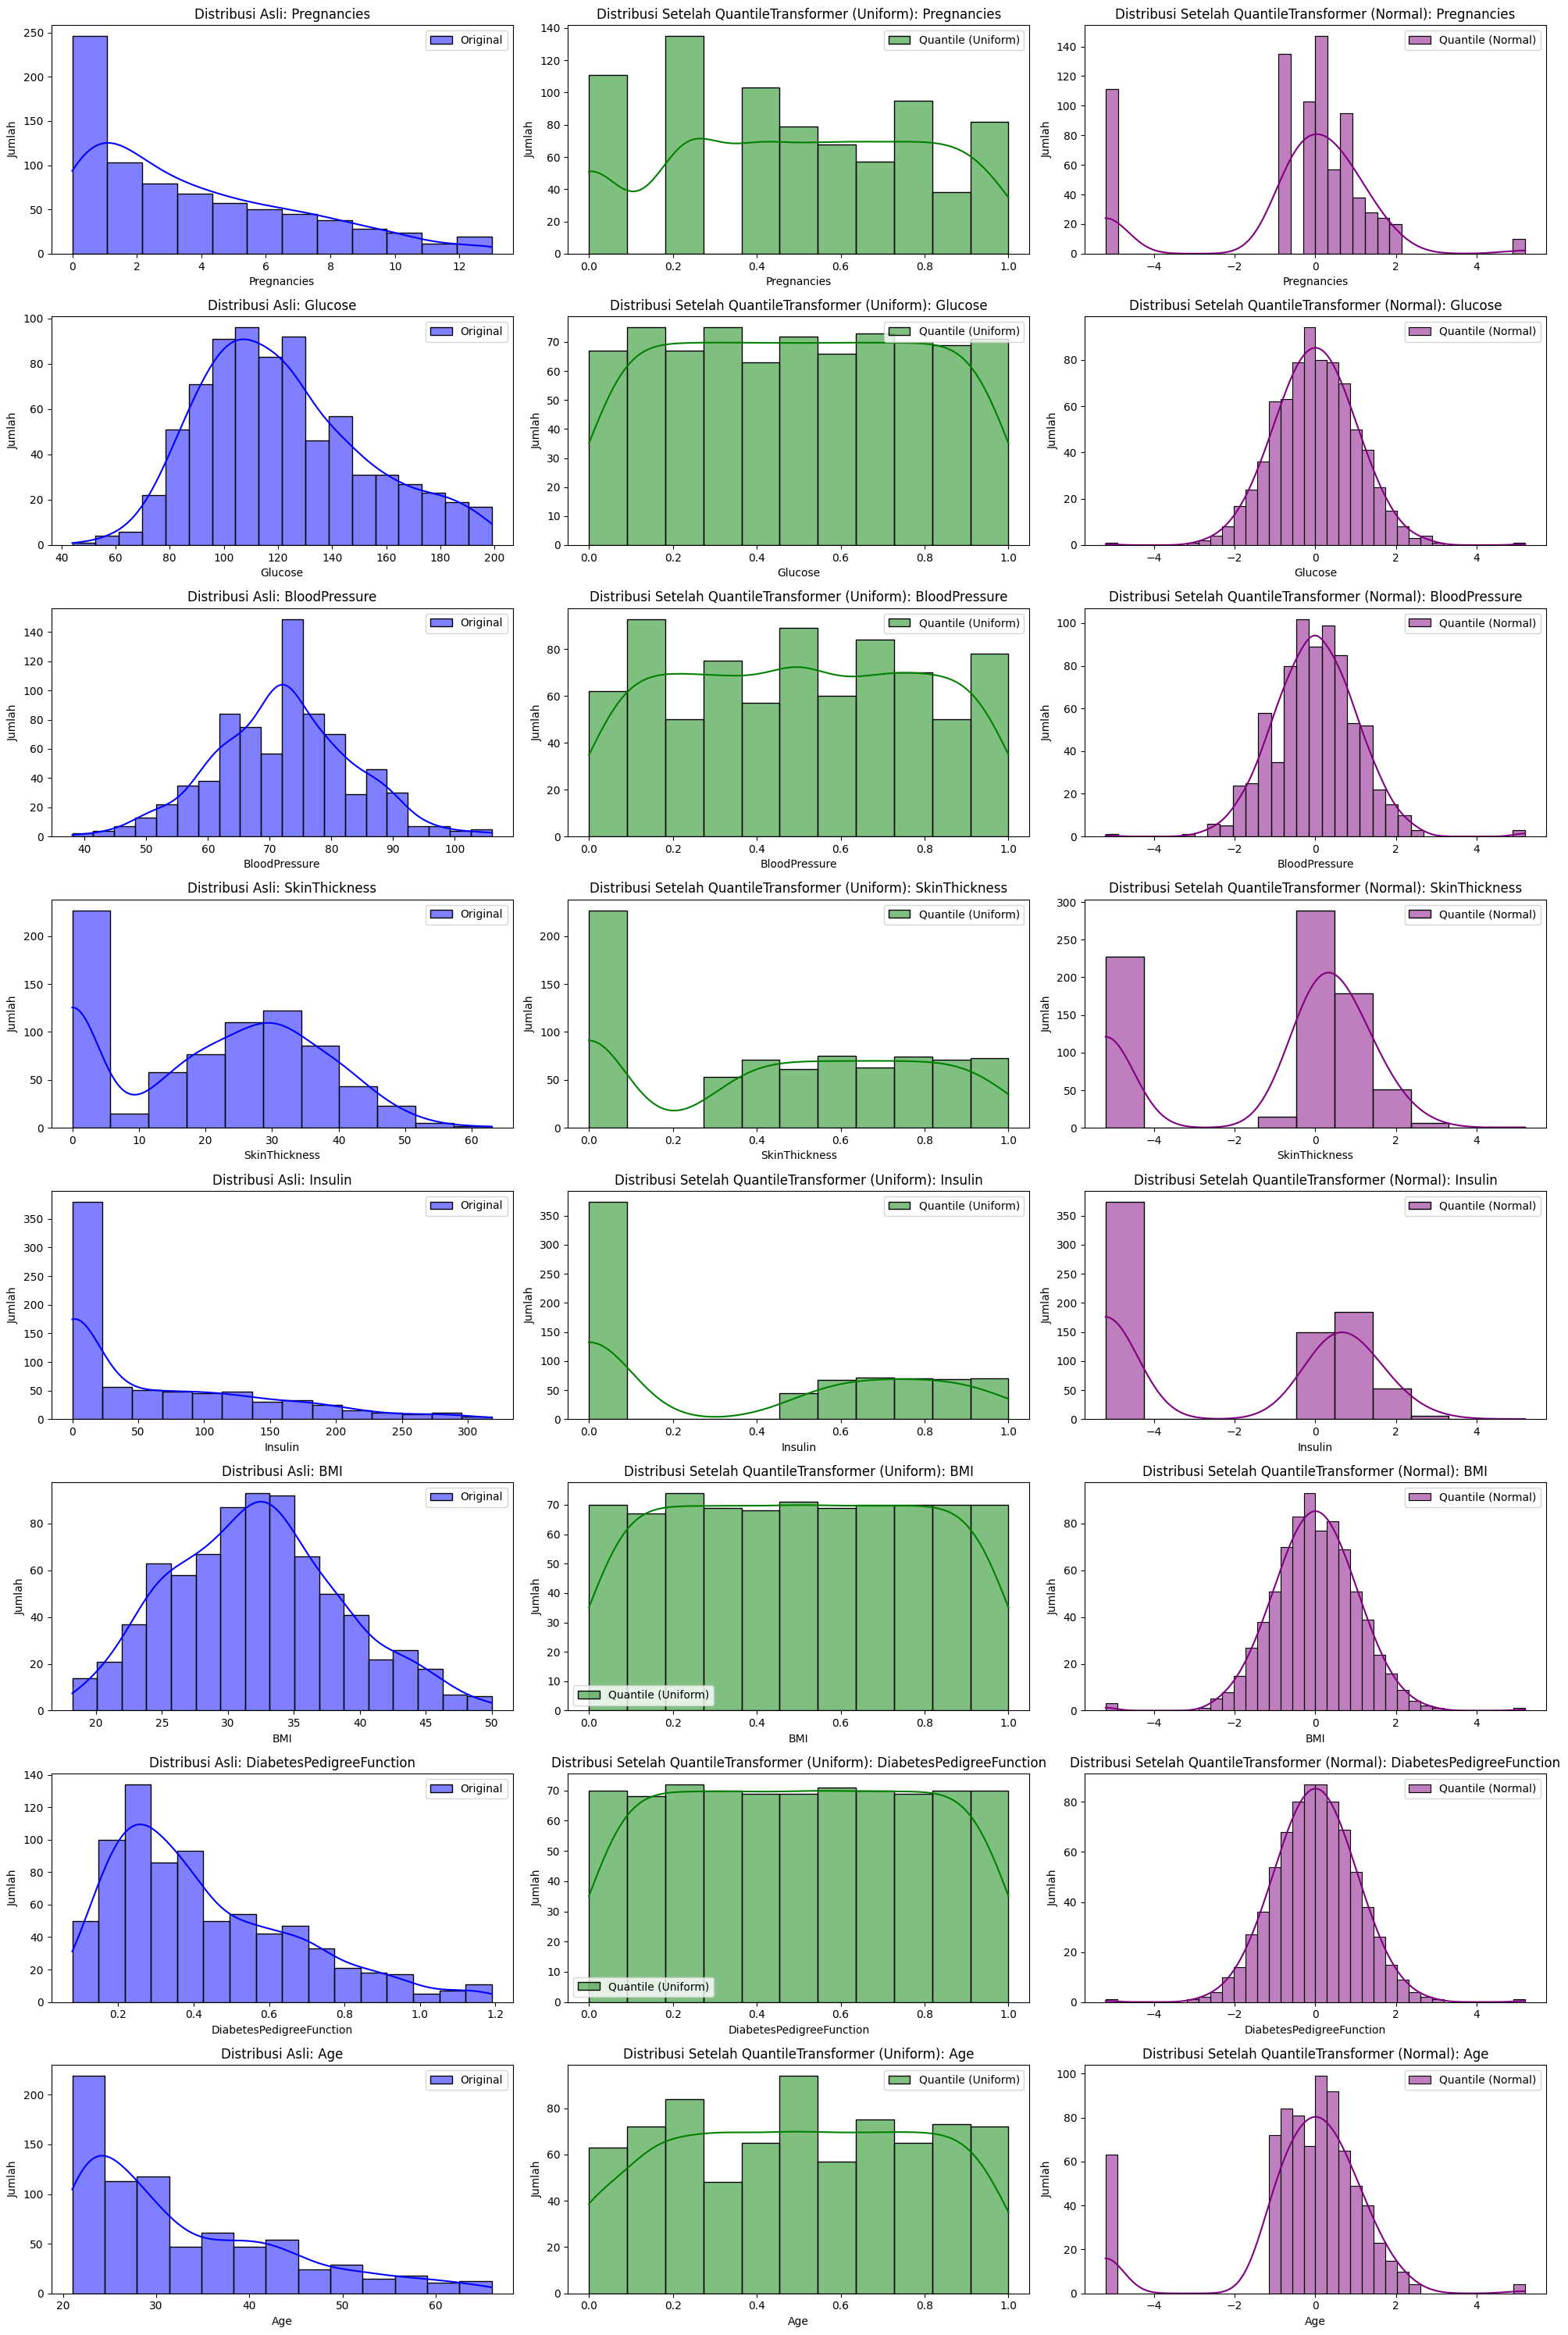

In [ ]:
visualize_quantile_transformer(df[numeric_features], df_quantile_uniform[numeric_features], df_quantile_normal[numeric_features], numeric_features)

## PowerTransformer Yeo-Johnson

In [ ]:
# 6. PowerTransformer - Yeo-Johnson
def apply_power_transformer_yeojohnson(data, features):
    # Membuat copy dari data asli
    df_scaled = data.copy()

    # Membuat objek PowerTransformer dengan metode Yeo-Johnson
    scaler = PowerTransformer(method='yeo-johnson')

    # Melakukan fit dan transform pada fitur numerik
    df_scaled[features] = scaler.fit_transform(data[features])

    return df_scaled

    # Visualisasi hasil transformasi
def visualize_yeojohnson_power_transformer(data_original, data_scaled, features):
    plt.figure(figsize=(15, 20))
    for i, feature in enumerate(features):
        # Histogram untuk distribusi asli
        plt.subplot(len(features), 3, 3 * i + 1)
        sns.histplot(data_original[feature], kde=True, color='blue', label='Original')
        plt.title(f'Distribusi Asli: {feature}')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Jumlah')

        # Histogram untuk distribusi setelah QuantileTransformer (Uniform)
        plt.subplot(len(features), 3, 3 * i + 2)
        sns.histplot(data_scaled[feature], kde=True, color='green')
        plt.title(f'Distribusi Setelah PowerTransformer (Yeo-Johnson): {feature}')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Jumlah')

    plt.tight_layout()
    plt.show()

### Menampilkan beberapa baris data setelah transformasi


In [ ]:
# Memanggil fungsi yeo-johnson
df_yeojohnson = apply_power_transformer_yeojohnson(df, numeric_features)

# Menampilkan beberapa baris data setelah transformasi
print("Hasil PowerTransformer (Yeo-Johnson):")
print(df_yeojohnson.head())

# Statistik deskriptif setelah transformasi
print("\nStatistik deskriptif setelah PowerTransformer (Yeo-Johnson):")
print(df_yeojohnson[numeric_features].describe())

Hasil PowerTransformer (Yeo-Johnson):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.832860  0.907992      -0.008306       0.885655 -1.007776  0.272228   
1    -0.835055 -1.305305      -0.549247       0.637090 -1.007776 -0.862047   
2     1.217122  1.785503      -0.730847      -1.431749 -1.007776 -1.455885   
3    -0.835055 -1.126118      -0.549247       0.363346  0.945058 -0.605902   
4    -1.603210  0.592903      -2.971473       0.885655  1.171638  1.613558   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.974100  1.418720        1  
1                 -0.117227  0.153636        0  
2                  1.102808  0.259667        1  
3                 -1.312736 -1.489350        0  
4                 -0.007982  0.359004        1  

Statistik deskriptif setelah PowerTransformer (Yeo-Johnson):
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680

### Visualisasi

<ipython-input-99-a4d9e6b247bf>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-99-a4d9e6b247bf>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-99-a4d9e6b247bf>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-99-a4d9e6b247bf>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-99-a4d9e6b247bf>:30: UserWarning: No artists with labels found to put in legend.  Note that artists w

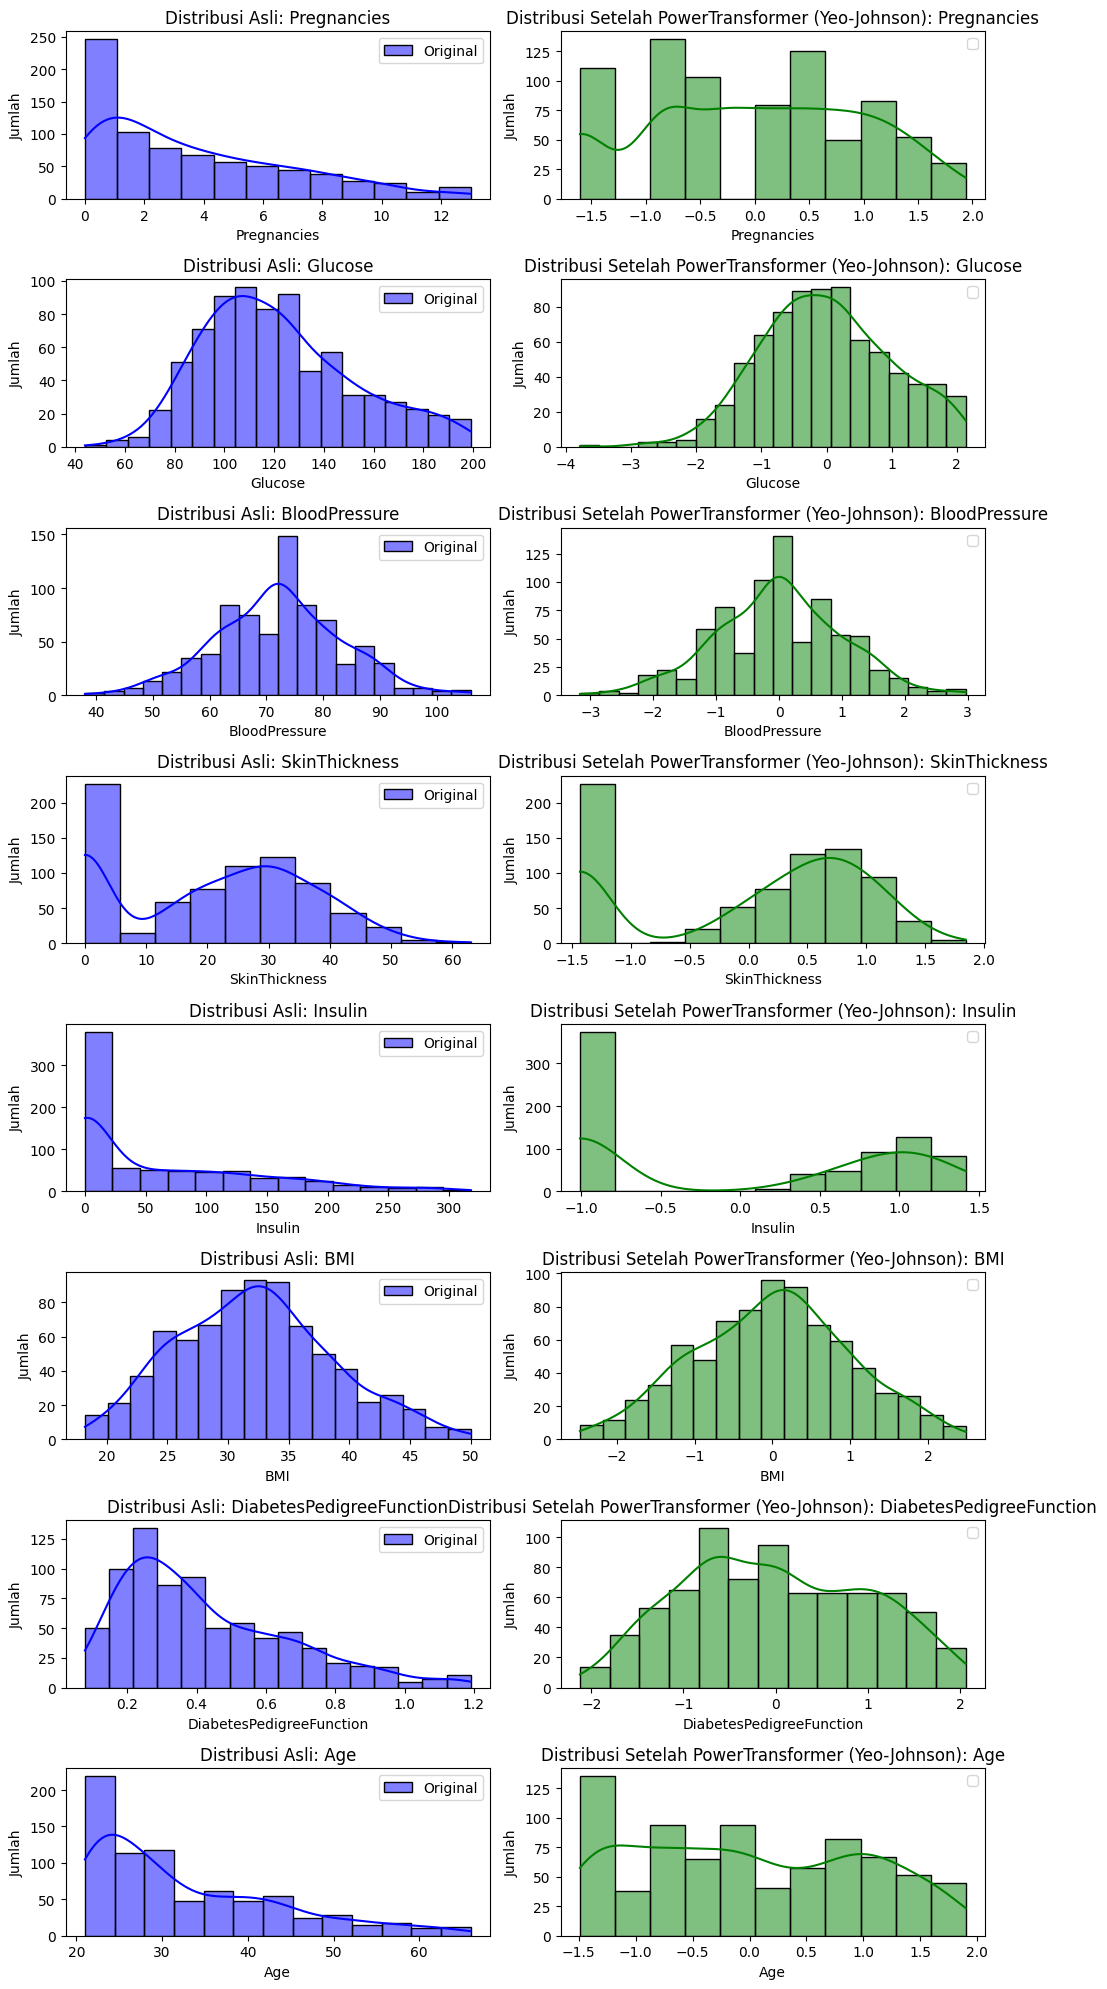

In [ ]:
# Visualisasi PowerTransformer dengan Yeo-Johnson
visualize_yeojohnson_power_transformer(df[numeric_features], df_yeojohnson[numeric_features], numeric_features)

## PowerTransformer Box-Cox

In [ ]:
# 7. PowerTransformer - Box-Cox
def apply_power_transformer_boxcox(data, features):
    # Membuat copy dari data asli
    df_scaled = data.copy()

    # Data harus positif untuk Box-Cox, jadi kita perlu memastikan semua nilai > 0
    # Mencari minimum setiap fitur
    mins = data[features].min()

    # Mengubah data agar positif dengan menambahkan offset
    for feature in features:
        if mins[feature] <= 0:
            offset = abs(mins[feature]) + 1  # Tambahkan 1 untuk memastikan nilai positif
            df_scaled[feature] = data[feature] + offset
        else:
            df_scaled[feature] = data[feature]

    # Membuat objek PowerTransformer dengan metode Box-Cox
    scaler = PowerTransformer(method='box-cox')

    # Melakukan fit dan transform pada fitur numerik yang sudah diubah
    try:
        df_scaled[features] = scaler.fit_transform(df_scaled[features])

        # Visualisasi hasil transformasi
        plt.figure(figsize=(15, 10))
        for i, feature in enumerate(features):
            plt.subplot(3, 3, i+1)
            sns.histplot(data[feature], color='blue', kde=True, label='Original')
            sns.histplot(df_scaled[feature], color='green', kde=True, alpha=0.7, label='Box-Cox')
            plt.title(f'PowerTransformer (Box-Cox): {feature}')
            plt.legend()
        plt.tight_layout()
        plt.suptitle('Perbandingan Distribusi Sebelum dan Sesudah PowerTransformer (Box-Cox)', fontsize=16)
        plt.subplots_adjust(top=0.9)
        plt.show()

        return df_scaled, scaler
    except Exception as e:
        print(f"Error dalam menerapkan Box-Cox: {e}")
        print("Beberapa fitur mungkin masih memiliki nilai non-positif setelah offset.")
        return None, None

### Menampilkan beberapa baris data setelah transformasi

In [ ]:

# Menampilkan beberapa baris data setelah transformasi (jika berhasil)
if df_boxcox is not None:
    print("Hasil PowerTransformer (Box-Cox):")
    print(df_boxcox.head())

    # Statistik deskriptif setelah transformasi
    print("\nStatistik deskriptif setelah PowerTransformer (Box-Cox):")
    print(df_boxcox[numeric_features].describe())

Hasil PowerTransformer (Box-Cox):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.813399  0.848665       0.068935       0.876707 -1.008294  0.174124   
1    -0.833906 -1.123027      -0.306484       0.632185 -1.008294 -0.725726   
2     1.188996  1.930906      -0.427244      -1.430072 -1.008294 -1.129341   
3    -0.833906 -0.996671      -0.306484       0.362347  0.859700 -0.537700   
4    -1.603317  0.506848      -1.693204       0.876707  1.077013  1.477376   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.776754  1.362797        1  
1                 -0.112234  0.127990        0  
2                  0.880461  0.231506        1  
3                 -1.306876 -1.483064        0  
4                  2.629492  0.328461        1  

Statistik deskriptif setelah PowerTransformer (Box-Cox):
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02 

### Visualisasi

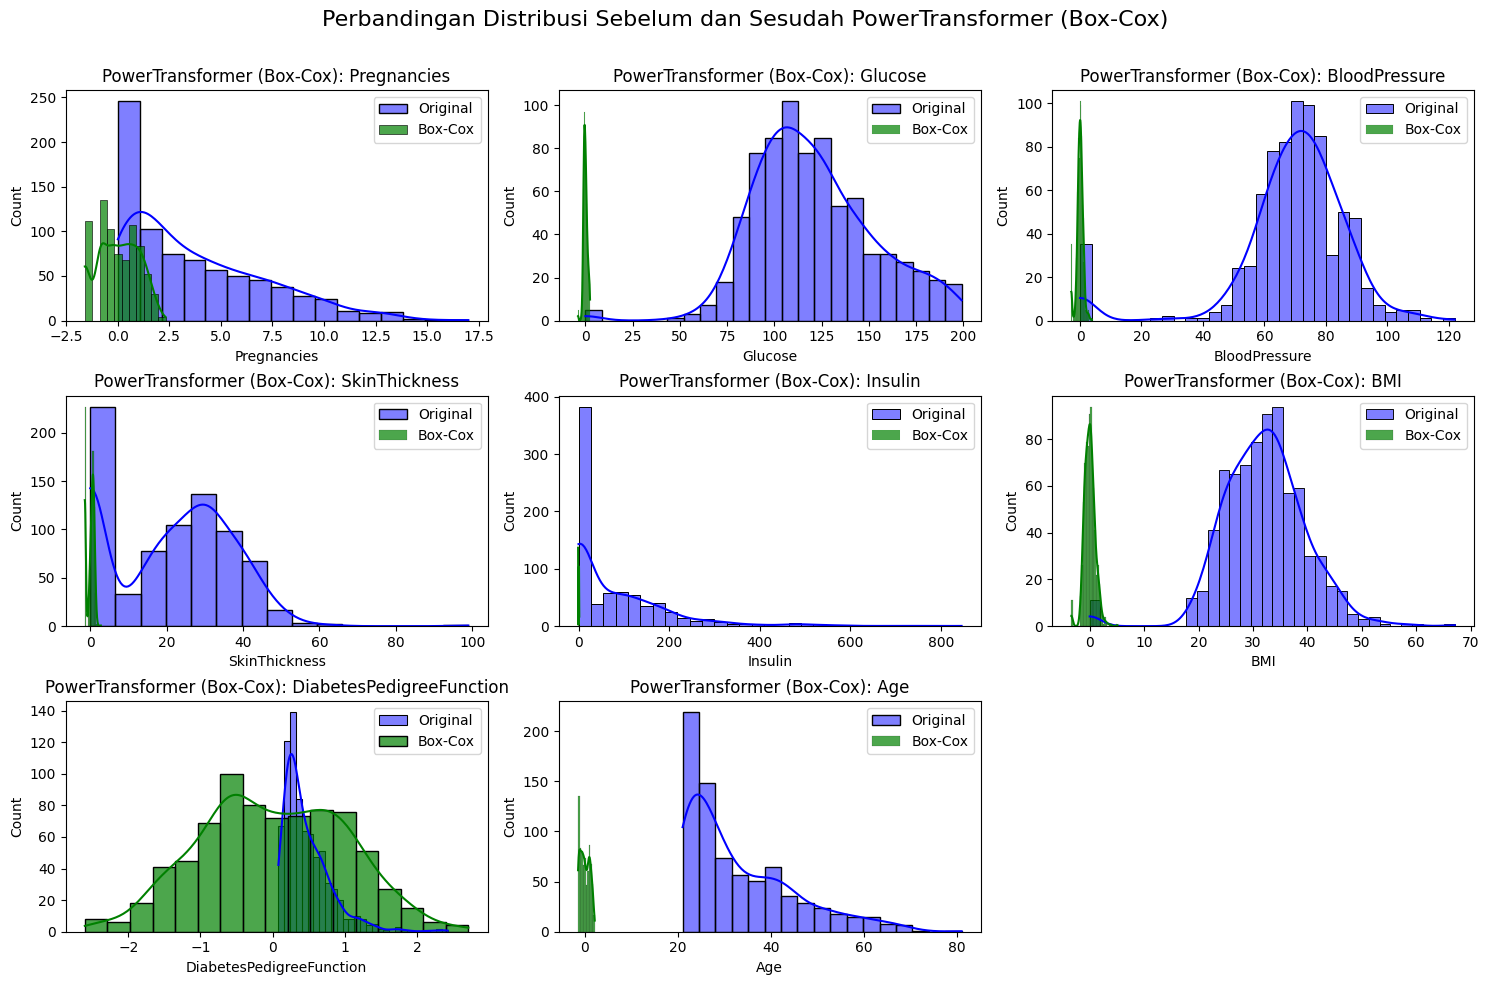

In [ ]:
# Menerapkan PowerTransformer dengan Box-Cox
df_boxcox, boxcox_scaler = apply_power_transformer_boxcox(df, numeric_features)


## Log Transformation

In [ ]:
# 8. Log Transformation
def apply_log_transformation(data, features):
    # Membuat copy dari data asli
    df_scaled = data.copy()

    # Mencari minimum setiap fitur
    mins = data[features].min()

    # Log transformation tidak bisa diaplikasikan pada nilai <= 0, jadi kita perlu menambahkan offset
    for feature in features:
        # Jika minimum <= 0, tambahkan offset
        if mins[feature] <= 0:
            offset = abs(mins[feature]) + 1  # Tambahkan 1 untuk memastikan nilai positif
            df_scaled[feature] = np.log(data[feature] + offset)
        else:
            df_scaled[feature] = np.log(data[feature])

    # Visualisasi hasil transformasi
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(3, 3, i+1)
        sns.histplot(data[feature], color='blue', kde=True, label='Original')
        sns.histplot(df_scaled[feature], color='red', kde=True, alpha=0.7, label='Log Transformed')
        plt.title(f'Log Transformation: {feature}')
        plt.legend()
    plt.tight_layout()
    plt.suptitle('Perbandingan Distribusi Sebelum dan Sesudah Log Transformation', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

    return df_scaled



### Menampilkan beberapa baris data setelah transformasi


In [ ]:


# Menampilkan beberapa baris data setelah transformasi
print("Hasil Log Transformation:")
print(df_log.head())

# Statistik deskriptif setelah transformasi
print("\nStatistik deskriptif setelah Log Transformation:")
print(df_log[numeric_features].describe())

Hasil Log Transformation:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     1.945910  5.003946       4.290459       3.583519  0.000000  3.543854   
1     0.693147  4.454347       4.204693       3.401197  0.000000  3.317816   
2     2.197225  5.214936       4.174387       0.000000  0.000000  3.190476   
3     0.693147  4.499810       4.204693       3.178054  4.553877  3.370738   
4     0.000000  4.927254       3.713572       3.583519  5.129899  3.786460   

   DiabetesPedigreeFunction       Age  Outcome  
0                 -0.466809  3.912023        1  
1                 -1.046969  3.433987        0  
2                 -0.397497  3.465736        1  
3                 -1.789761  3.044522        0  
4                  0.827678  3.496508        1  

Statistik deskriptif setelah Log Transformation:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean     

### Visualisasi

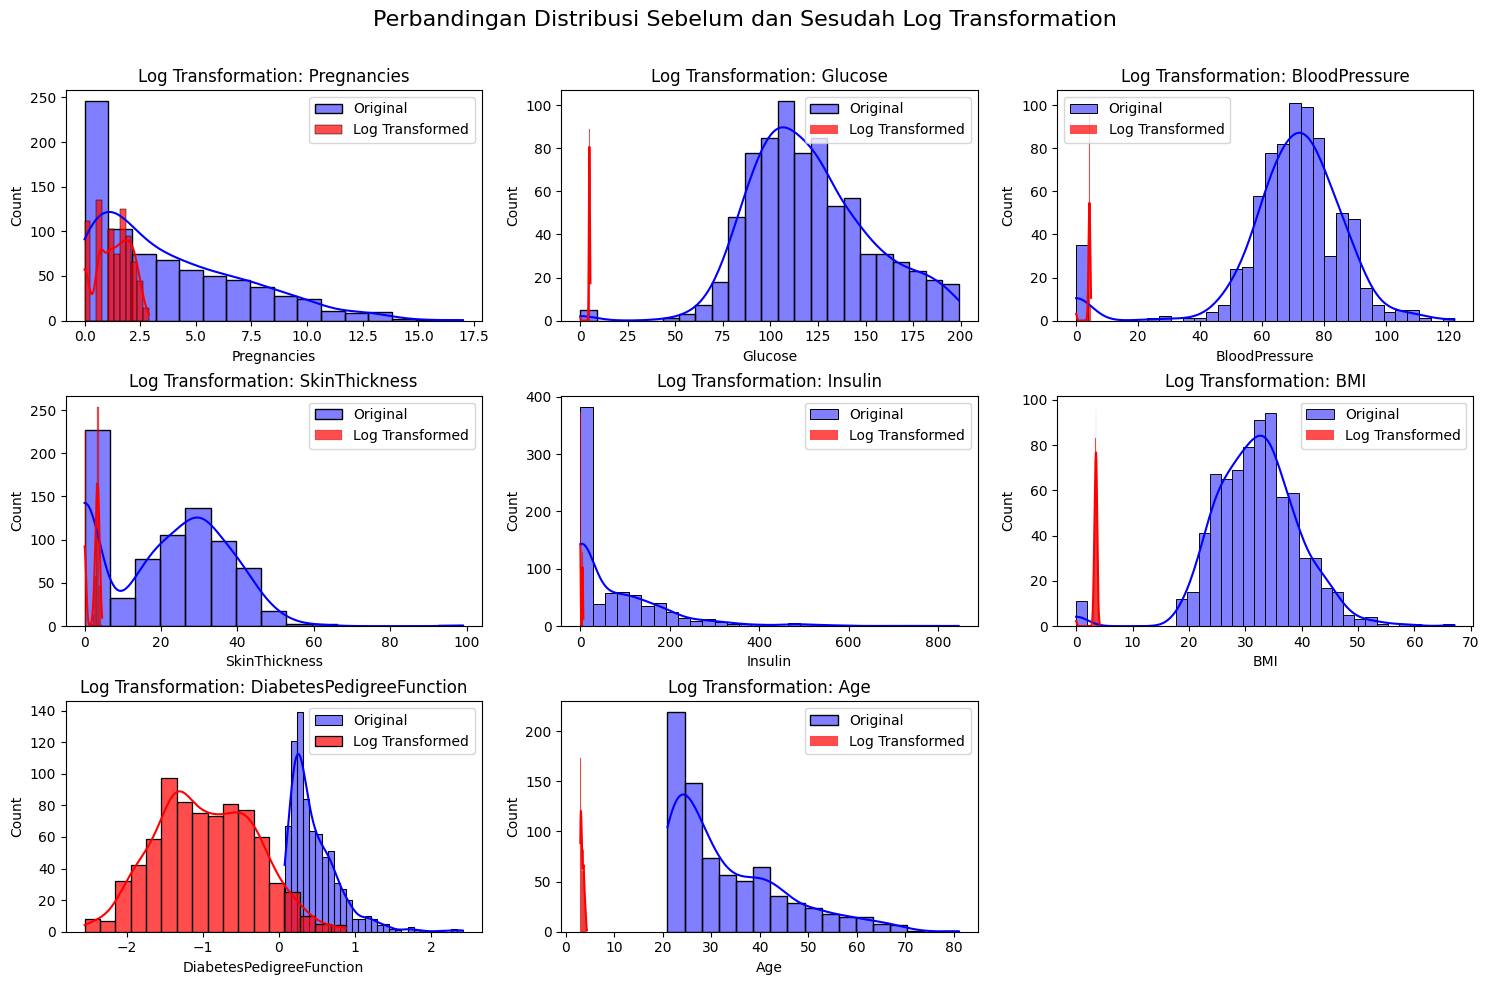

In [ ]:

# Menerapkan Log Transformation
df_log = apply_log_transformation(df, numeric_features)

## Rank Transformation

In [ ]:
# 9. Rank Transformation
def apply_rank_transformation(data, features, method='average'):
    # Membuat copy dari data asli
    df_scaled = data.copy()

    # Menerapkan rank transformation pada setiap fitur
    for feature in features:
        df_scaled[feature] = data[feature].rank(method=method)

    # Visualisasi hasil transformasi
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(3, 3, i+1)
        sns.histplot(data[feature], color='blue', kde=True, label='Original')
        sns.histplot(df_scaled[feature], color='orange', kde=True, alpha=0.7, label='Rank Transformed')
        plt.title(f'Rank Transformation: {feature}')
        plt.legend()
    plt.tight_layout()
    plt.suptitle('Perbandingan Distribusi Sebelum dan Sesudah Rank Transformation', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

    return df_scaled




### Menampilkan beberapa baris data setelah transformasi

In [ ]:

# Menampilkan beberapa baris data setelah transformasi
print("Hasil Rank Transformation:")
print(df_rank.head())

# Statistik deskriptif setelah transformasi
print("\nStatistik deskriptif setelah Rank Transformation:")
print(df_rank[numeric_features].describe())

Hasil Rank Transformation:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0        574.5    622.5          397.5          616.0    187.5  454.5   
1        179.0     76.0          258.5          495.0    187.5  175.5   
2        663.5    735.0          215.0          114.0    187.5   71.5   
3        179.0    101.5          258.5          388.5    509.0  230.0   
4         56.0    554.5           40.0          616.0    640.5  712.0   

   DiabetesPedigreeFunction    Age  Outcome  
0                     577.0  683.5        1  
1                     366.0  429.5        0  
2                     601.0  449.5        1  
3                      82.5   32.0        0  
4                     766.0  466.0        1  

Statistik deskriptif setelah Rank Transformation:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000      768.00000  768.000000   
mean    384.500000  384.500000     384.500000      384.

### Visualisasi

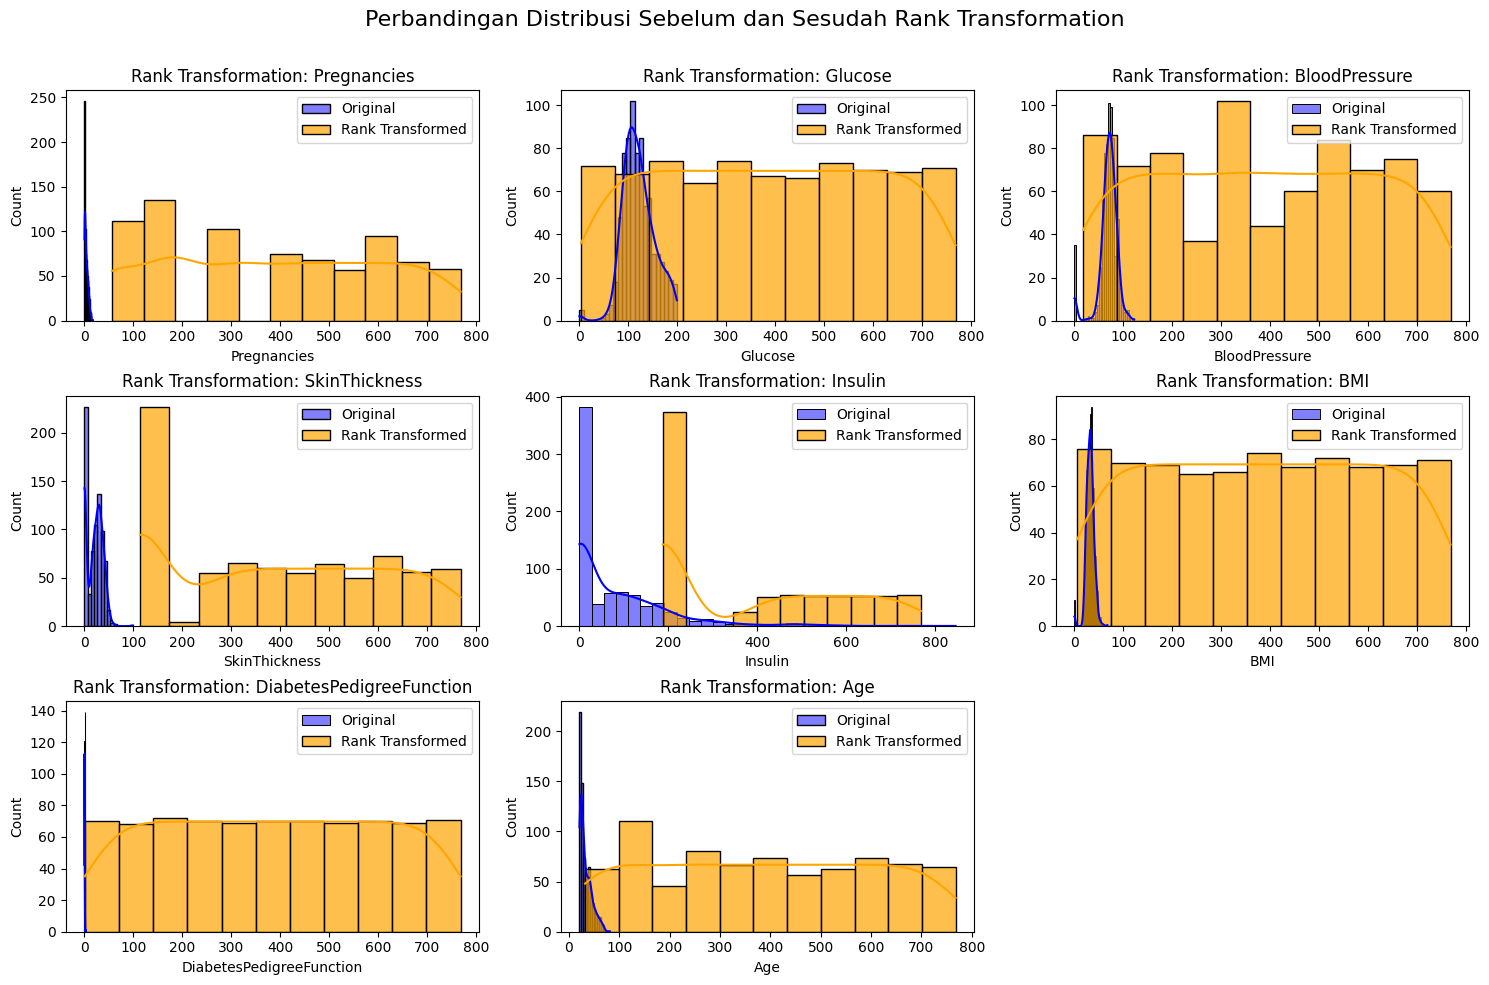

In [ ]:
# Menerapkan Rank Transformation
df_rank = apply_rank_transformation(df, numeric_features)


## Perbandingan Hasil Transformasi

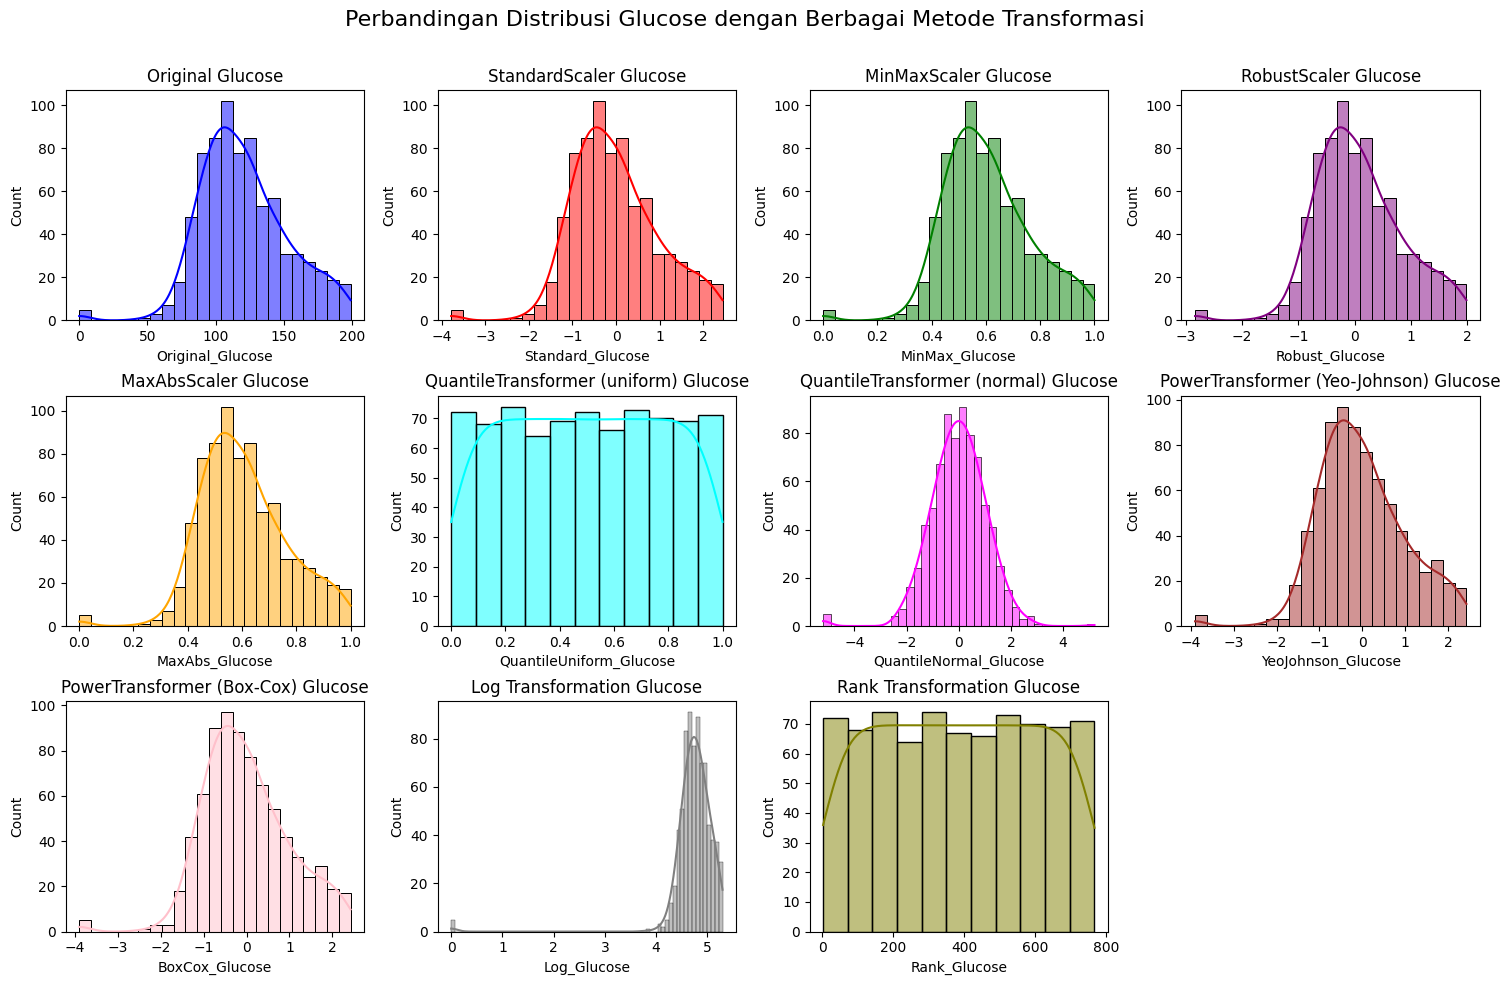

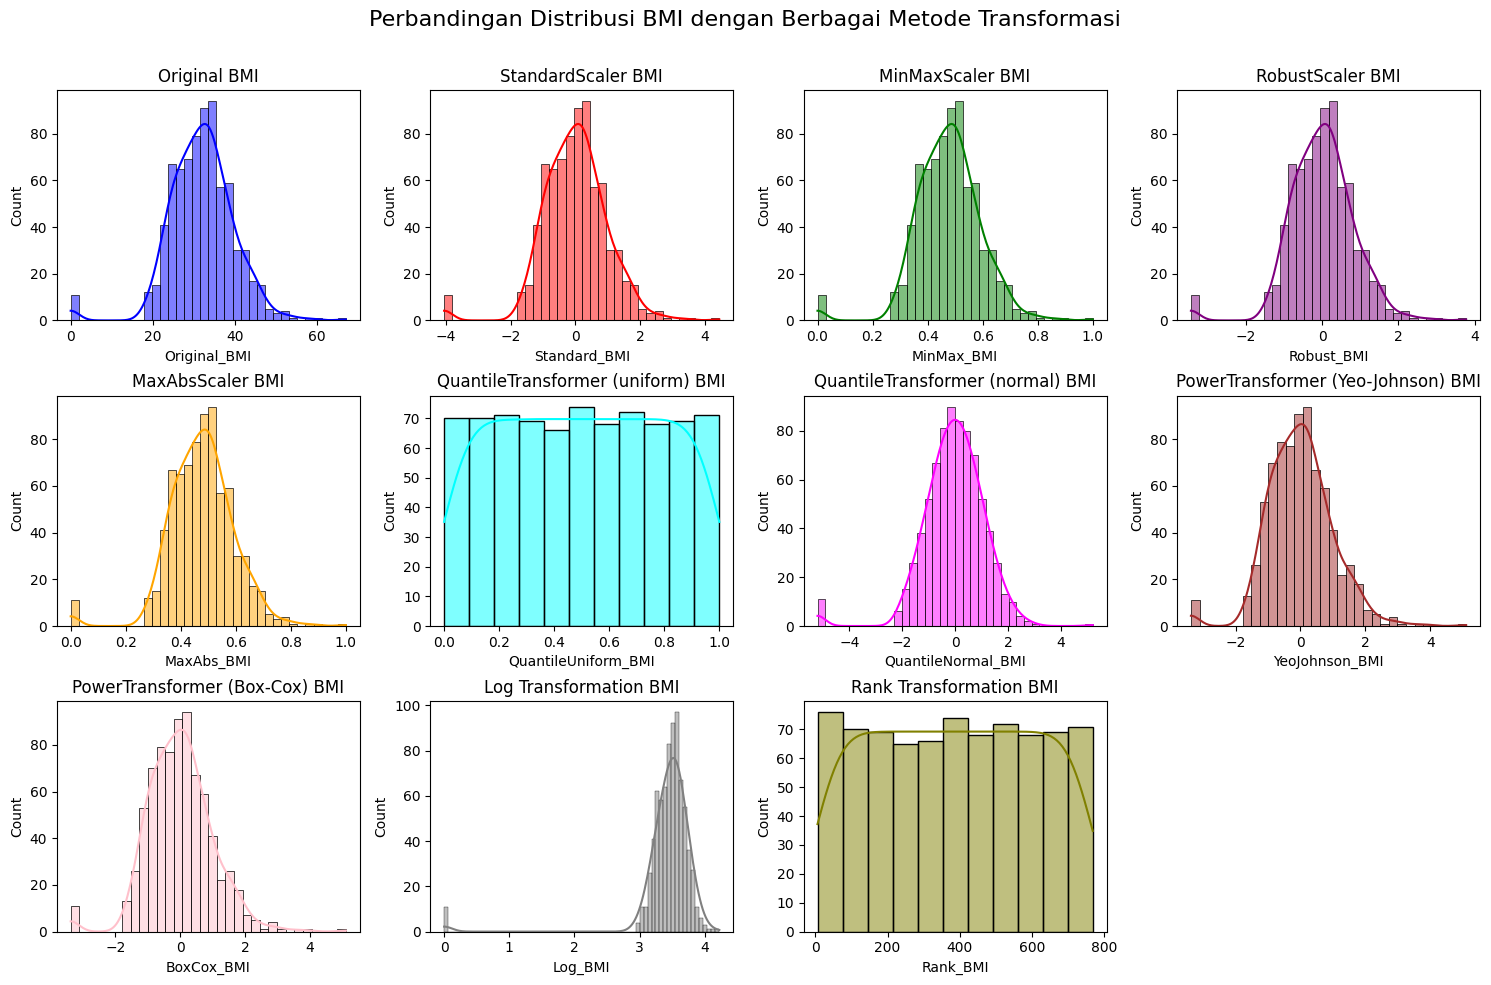

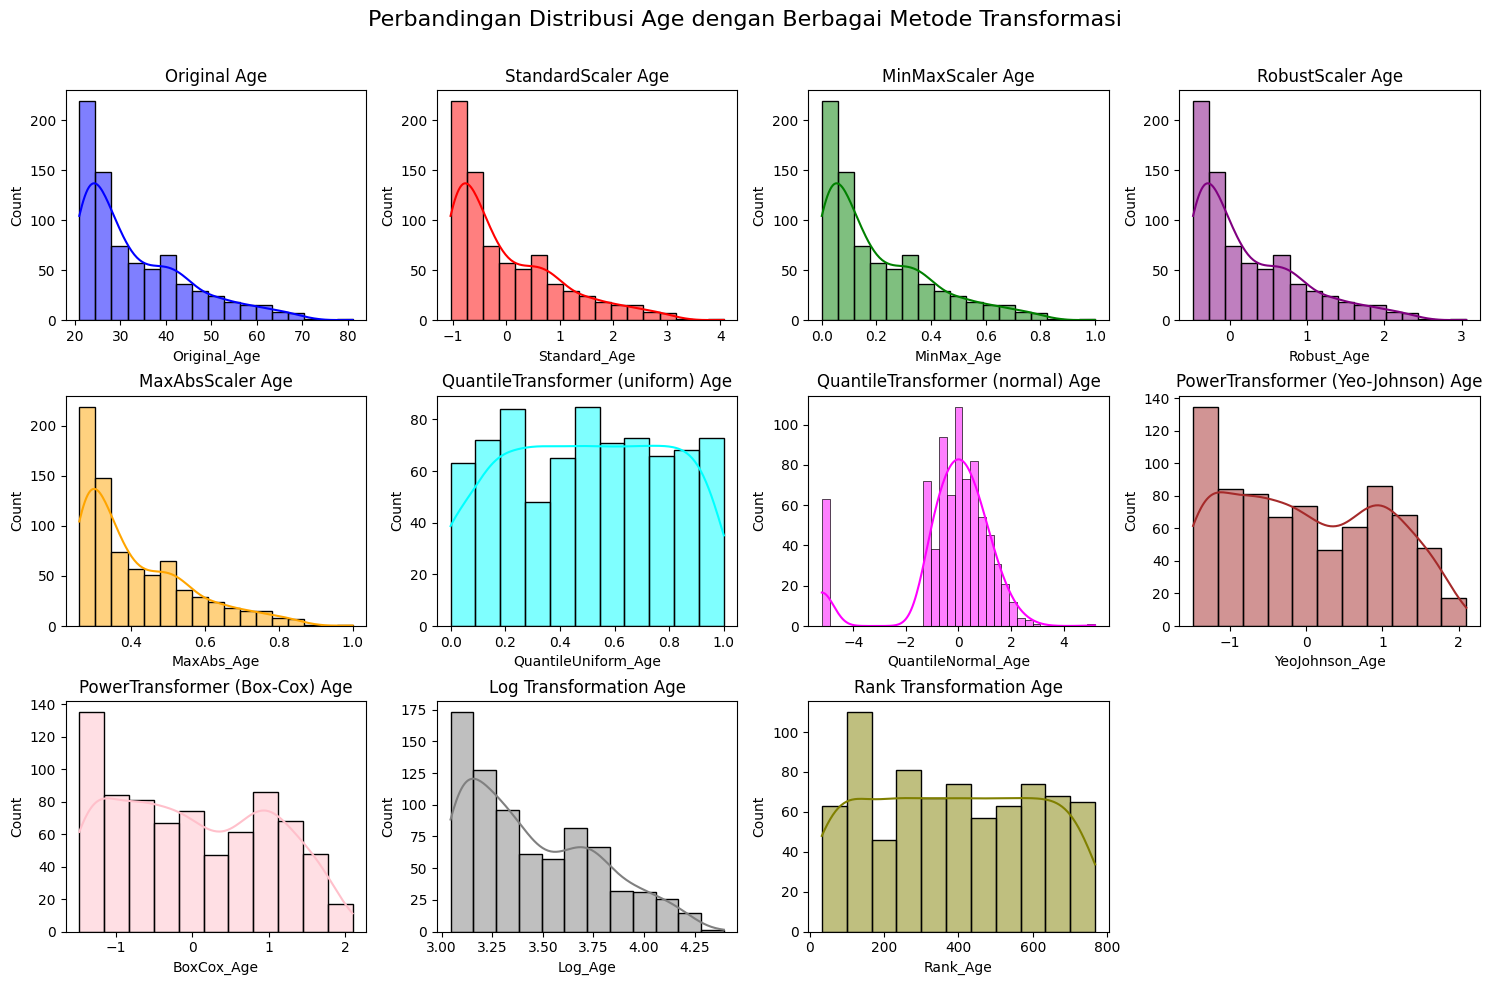

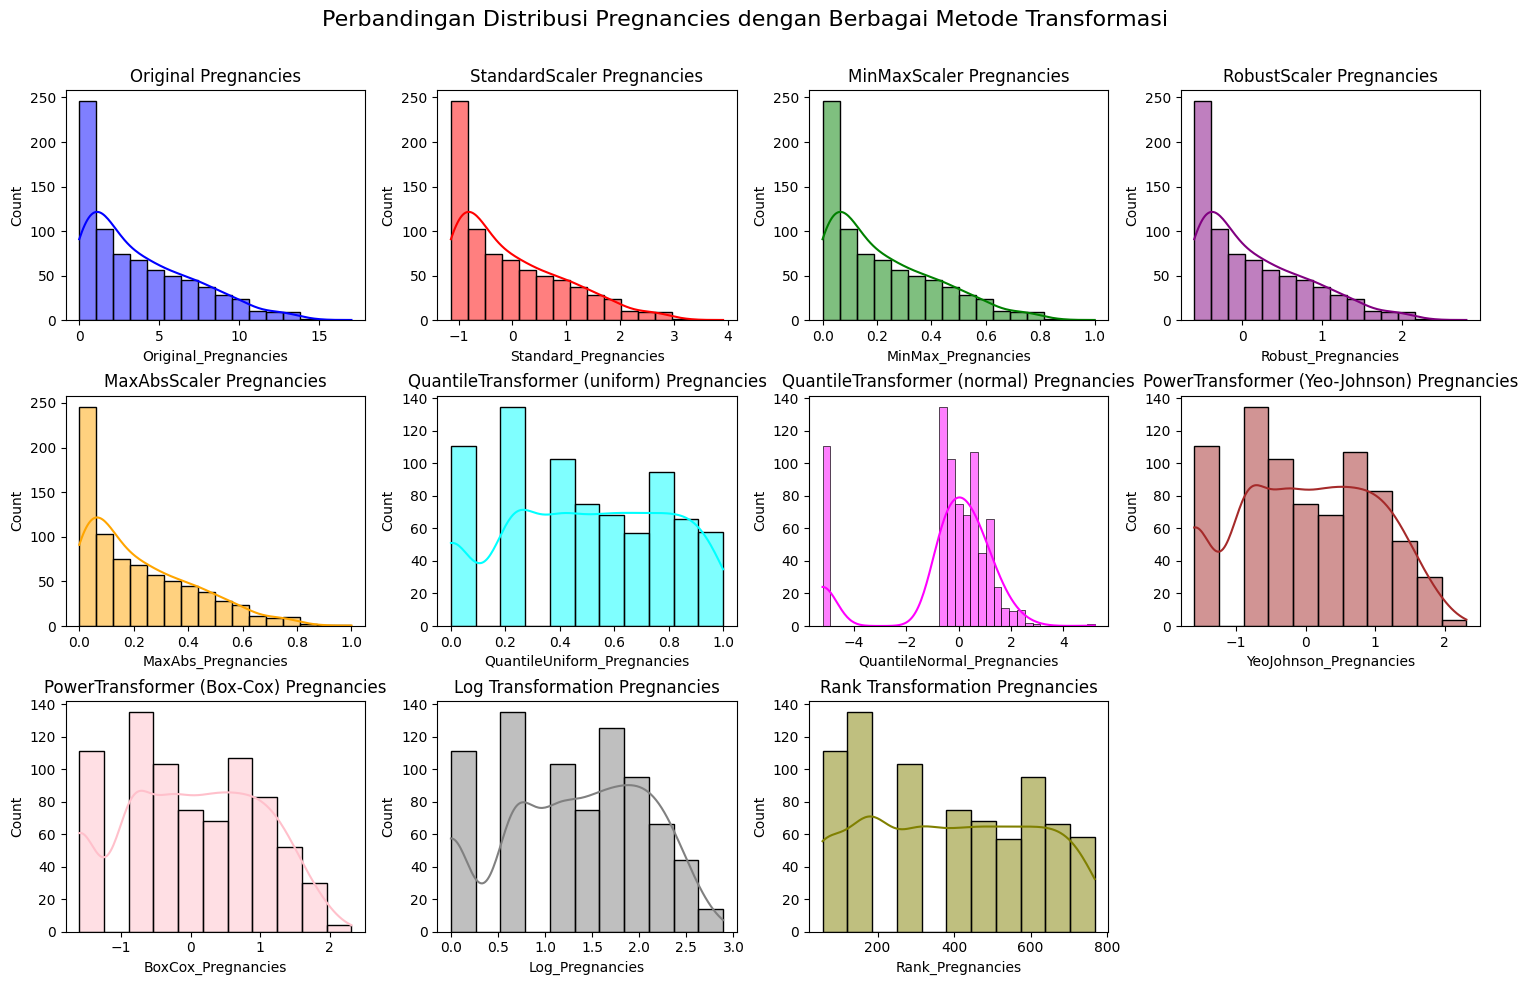

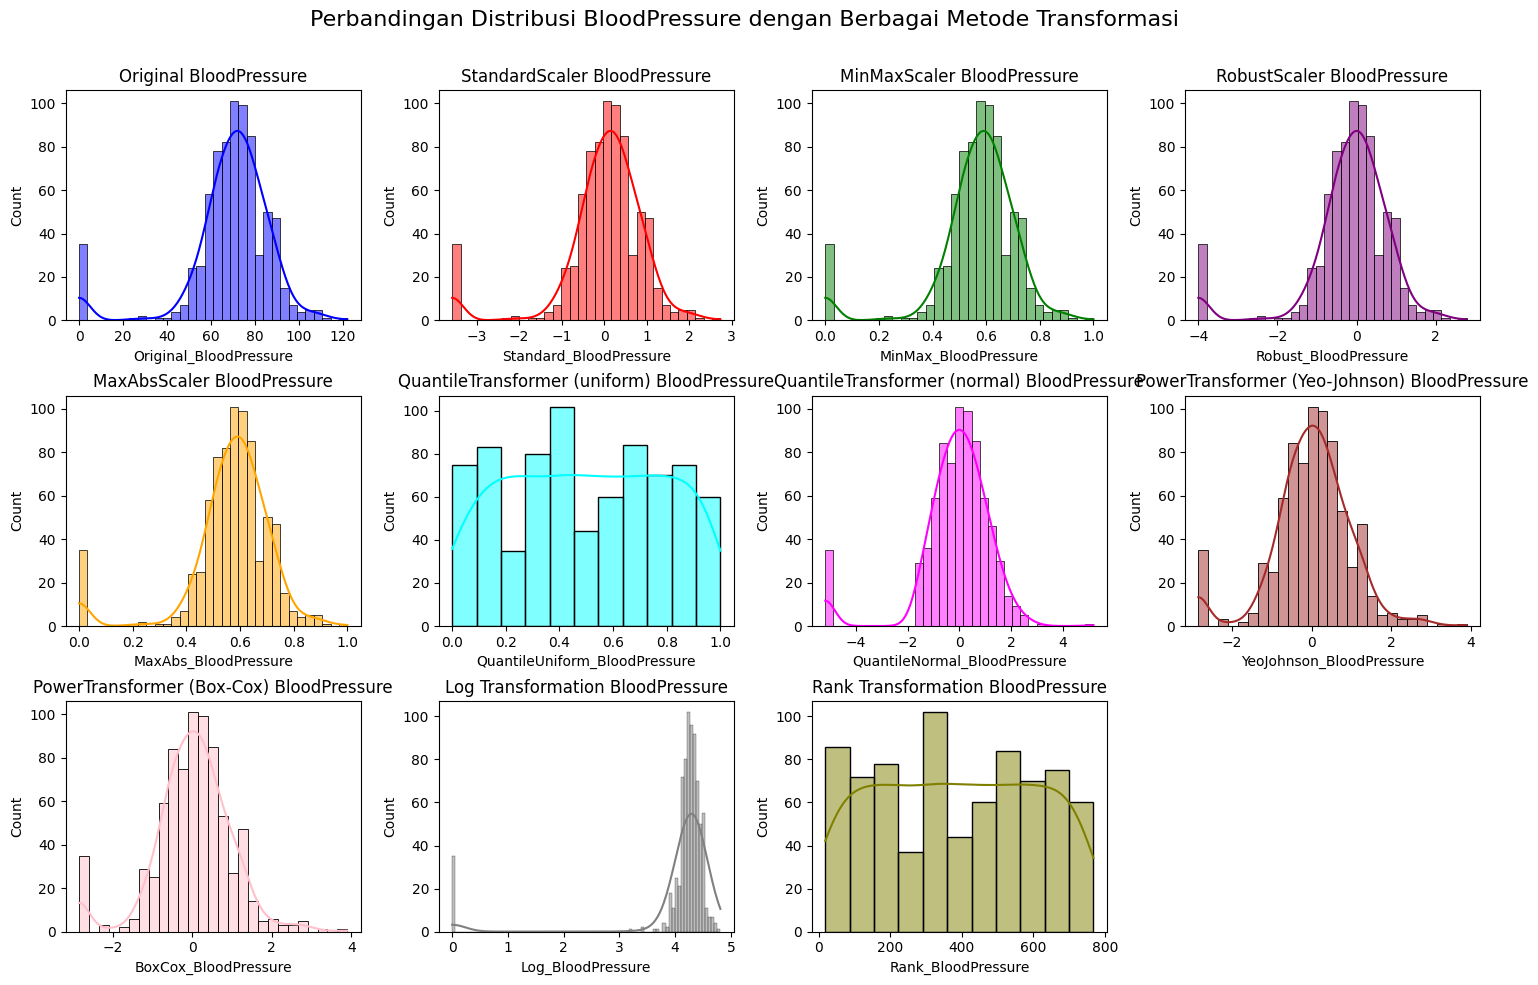

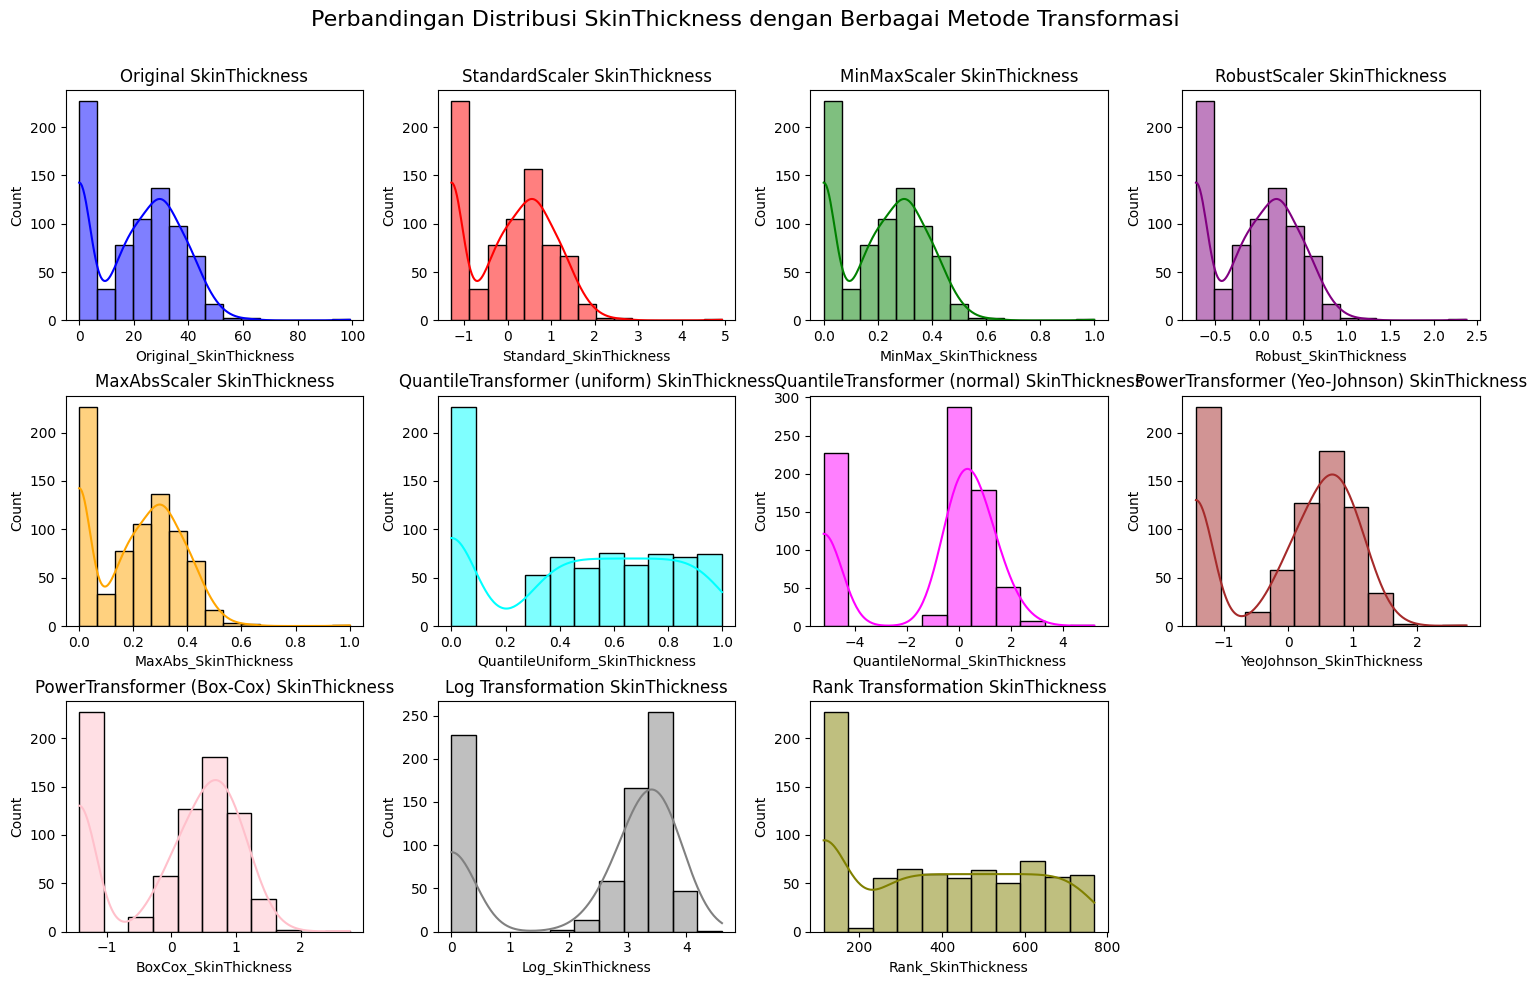

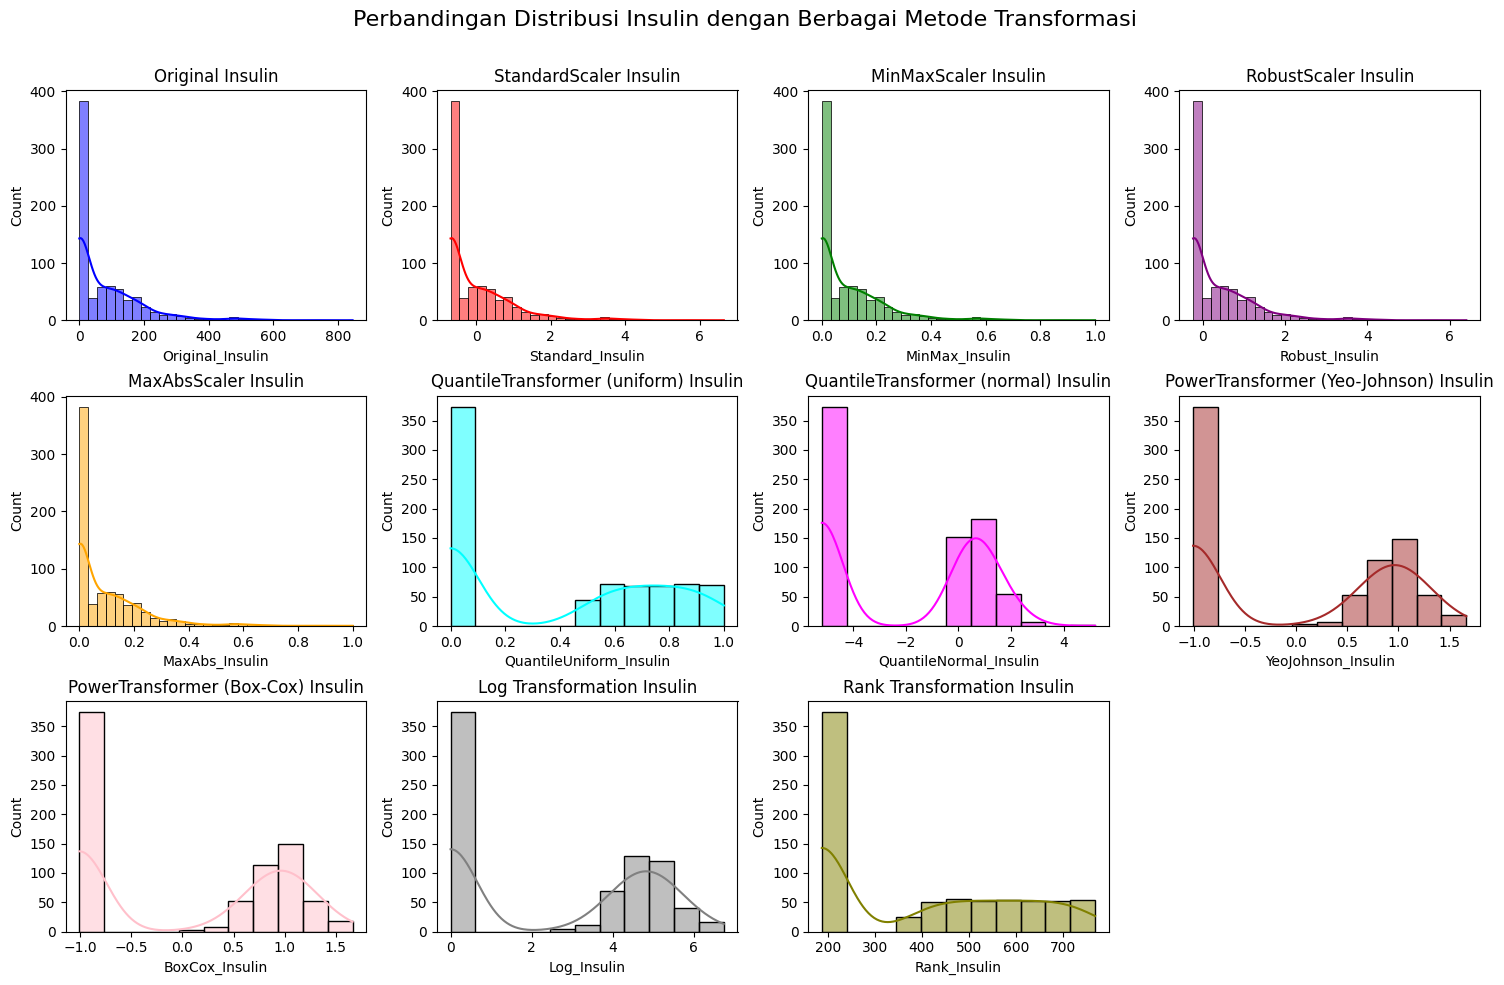

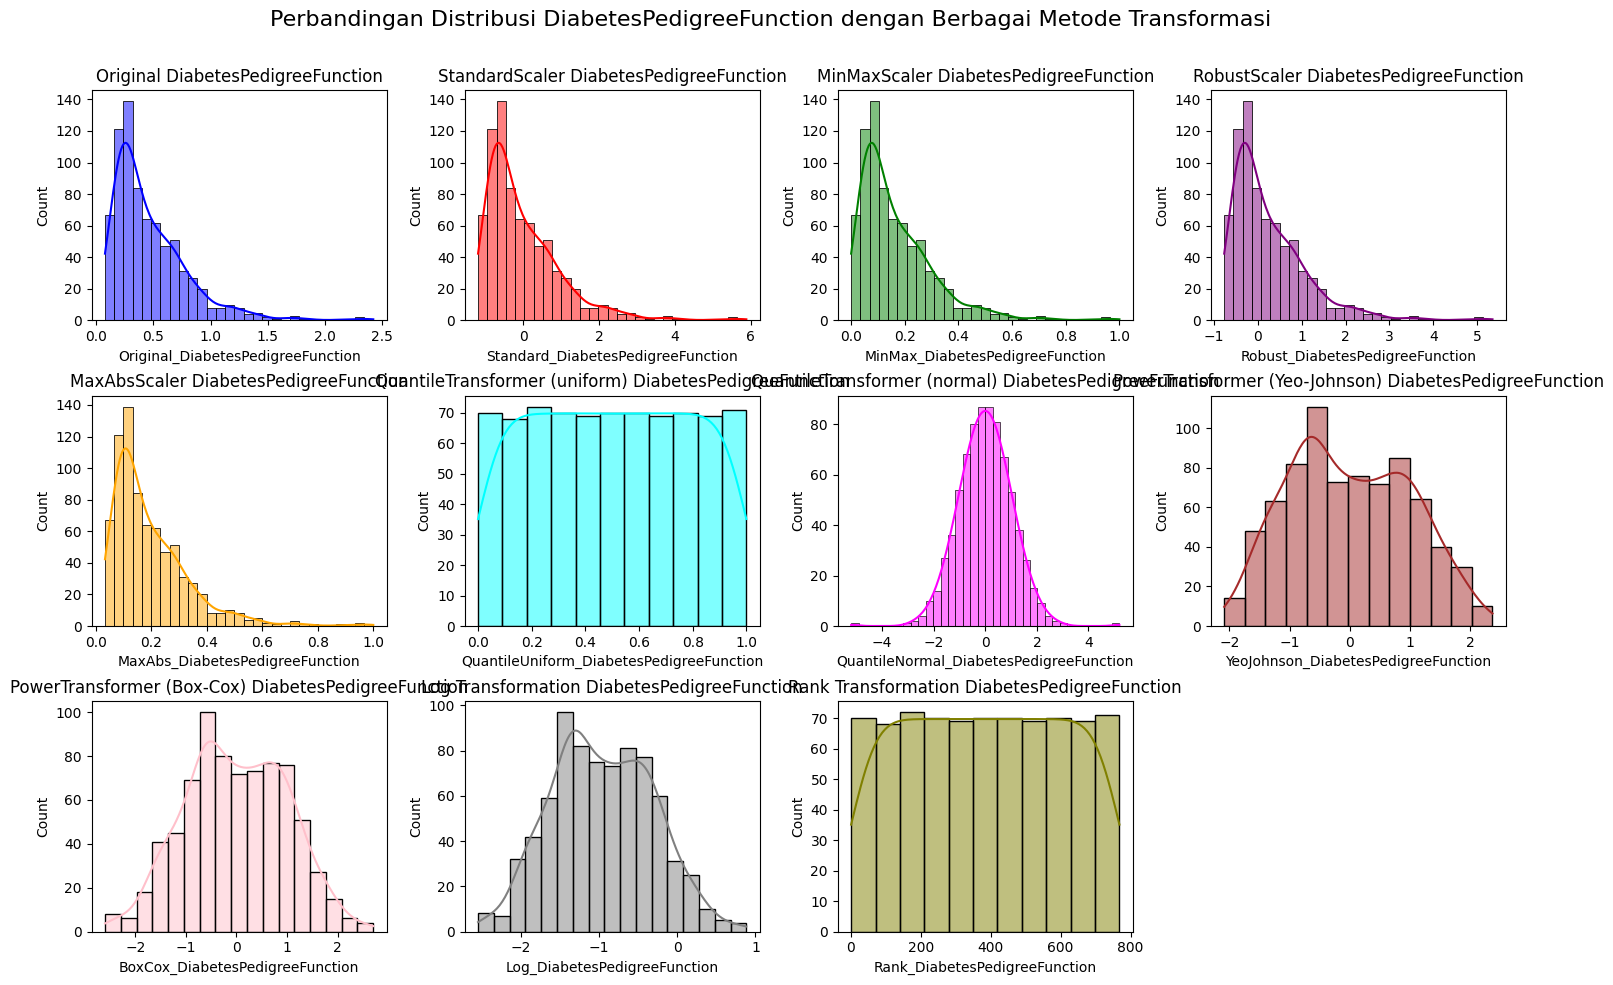

In [ ]:
features_to_compare = ['Glucose', 'BMI', 'Age', 'Pregnancies','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction']

# Membuat dataframe untuk perbandingan
comparison_df = pd.DataFrame()
for feature in features_to_compare:
    comparison_df[f'Original_{feature}'] = df[feature]
    comparison_df[f'Standard_{feature}'] = df_standard[feature]
    comparison_df[f'MinMax_{feature}'] = df_minmax[feature]
    comparison_df[f'Robust_{feature}'] = df_robust[feature]
    comparison_df[f'MaxAbs_{feature}'] = df_maxabs[feature]
    comparison_df[f'QuantileUniform_{feature}'] = df_quantile_uniform[feature]
    comparison_df[f'QuantileNormal_{feature}'] = df_quantile_normal[feature]
    comparison_df[f'YeoJohnson_{feature}'] = df_yeojohnson[feature]
    if df_boxcox is not None:
        comparison_df[f'BoxCox_{feature}'] = df_boxcox[feature]
    comparison_df[f'Log_{feature}'] = df_log[feature]
    comparison_df[f'Rank_{feature}'] = df_rank[feature]

# Visualisasi perbandingan
for feature in features_to_compare:
    plt.figure(figsize=(15, 10))

    # Original
    plt.subplot(3, 4, 1)
    sns.histplot(comparison_df[f'Original_{feature}'], kde=True, color='blue')
    plt.title(f'Original {feature}')

    # StandardScaler
    plt.subplot(3, 4, 2)
    sns.histplot(comparison_df[f'Standard_{feature}'], kde=True, color='red')
    plt.title(f'StandardScaler {feature}')

    # MinMaxScaler
    plt.subplot(3, 4, 3)
    sns.histplot(comparison_df[f'MinMax_{feature}'], kde=True, color='green')
    plt.title(f'MinMaxScaler {feature}')

    # RobustScaler
    plt.subplot(3, 4, 4)
    sns.histplot(comparison_df[f'Robust_{feature}'], kde=True, color='purple')
    plt.title(f'RobustScaler {feature}')

    # MaxAbsScaler
    plt.subplot(3, 4, 5)
    sns.histplot(comparison_df[f'MaxAbs_{feature}'], kde=True, color='orange')
    plt.title(f'MaxAbsScaler {feature}')

    # QuantileTransformer (uniform)
    plt.subplot(3, 4, 6)
    sns.histplot(comparison_df[f'QuantileUniform_{feature}'], kde=True, color='cyan')
    plt.title(f'QuantileTransformer (uniform) {feature}')

    # QuantileTransformer (normal)
    plt.subplot(3, 4, 7)
    sns.histplot(comparison_df[f'QuantileNormal_{feature}'], kde=True, color='magenta')
    plt.title(f'QuantileTransformer (normal) {feature}')

    # PowerTransformer (Yeo-Johnson)
    plt.subplot(3, 4, 8)
    sns.histplot(comparison_df[f'YeoJohnson_{feature}'], kde=True, color='brown')
    plt.title(f'PowerTransformer (Yeo-Johnson) {feature}')

    # PowerTransformer (Box-Cox) jika tersedia
    if df_boxcox is not None:
        plt.subplot(3, 4, 9)
        sns.histplot(comparison_df[f'BoxCox_{feature}'], kde=True, color='pink')
        plt.title(f'PowerTransformer (Box-Cox) {feature}')

    # Log Transformation
    plt.subplot(3, 4, 10)
    sns.histplot(comparison_df[f'Log_{feature}'], kde=True, color='gray')
    plt.title(f'Log Transformation {feature}')

    # Rank Transformation
    plt.subplot(3, 4, 11)
    sns.histplot(comparison_df[f'Rank_{feature}'], kde=True, color='olive')
    plt.title(f'Rank Transformation {feature}')

    plt.tight_layout()
    plt.suptitle(f'Perbandingan Distribusi {feature} dengan Berbagai Metode Transformasi', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()


# **Encoding**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# Membaca dataset
df = pd.read_csv('diabetes.csv')

# Membuat fitur kategorikal berdasarkan BMI
def assign_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(assign_bmi_category)

# Melihat distribusi kategori
print(df['BMI_Category'].value_counts())

BMI_Category
Obese          472
Overweight     179
Normal         102
Underweight     15
Name: count, dtype: int64


## One-Hot Encoding

In [ ]:
# One-Hot Encoding menggunakan pandas get_dummies
df_onehot = pd.get_dummies(df, columns=['BMI_Category'], prefix='BMI')

# Visualisasi hasil
print("\nHasil One-Hot Encoding:")
print(df_onehot[['Pregnancies', 'BMI', 'BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']].head())

# Jumlah kolom sebelum dan sesudah
print(f"\nJumlah kolom sebelum One-Hot Encoding: {len(df.columns)}")
print(f"Jumlah kolom setelah One-Hot Encoding: {len(df_onehot.columns)}")


Hasil One-Hot Encoding:
   Pregnancies   BMI  BMI_Underweight  BMI_Normal  BMI_Overweight  BMI_Obese
0            6  33.6            False       False           False       True
1            1  26.6            False       False            True      False
2            8  23.3            False        True           False      False
3            1  28.1            False       False            True      False
4            0  43.1            False       False           False       True

Jumlah kolom sebelum One-Hot Encoding: 10
Jumlah kolom setelah One-Hot Encoding: 13


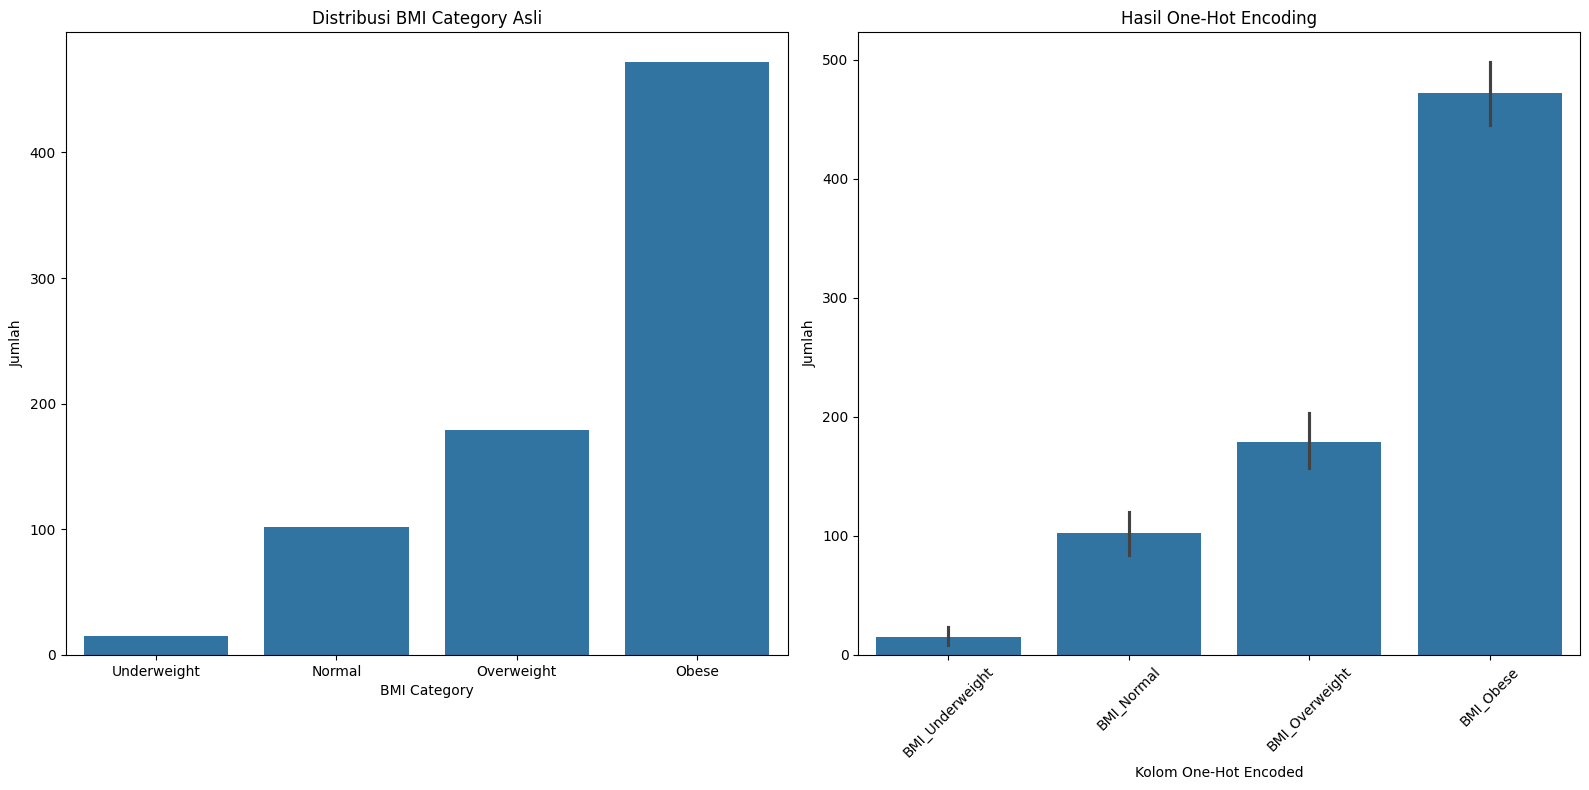

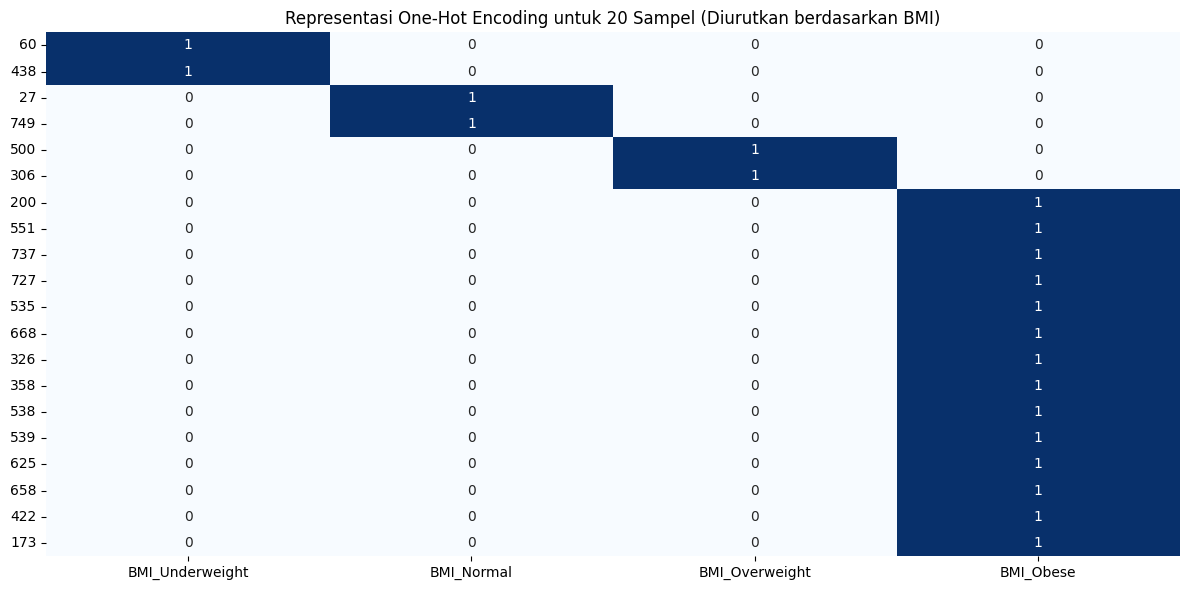

In [ ]:
# Visualisasi hasil
plt.figure(figsize=(16, 8))

# Plot distribusi kategori asli
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='BMI_Category', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Distribusi BMI Category Asli')
plt.xlabel('BMI Category')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

# Plot distribusi hasil one-hot encoding
plt.subplot(1, 2, 2)
melted_onehot = pd.melt(df_onehot[['BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']])
sns.barplot(x='variable', y='value', data=melted_onehot, estimator=sum)
plt.title('Hasil One-Hot Encoding')
plt.xlabel('Kolom One-Hot Encoded')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Visualisasi heatmap untuk melihat representasi one-hot
plt.figure(figsize=(12, 6))
sample_data = df_onehot.sample(20)[['BMI', 'BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']]
sample_data = sample_data.sort_values('BMI')
sns.heatmap(sample_data[['BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']],
            cmap='Blues', cbar=False, annot=True, fmt='g')
plt.title('Representasi One-Hot Encoding untuk 20 Sampel (Diurutkan berdasarkan BMI)')
plt.tight_layout()
plt.show()

## Label Encoding

In [ ]:
le = LabelEncoder()
df_label = df.copy()
df_label['BMI_Category_Label'] = le.fit_transform(df['BMI_Category'])
print("\nLabel Encoding Mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")
print("\nHasil Label Encoding:")
print(df_label[['Pregnancies', 'BMI', 'BMI_Category', 'BMI_Category_Label']].head())


Label Encoding Mapping:
Normal -> 0
Obese -> 1
Overweight -> 2
Underweight -> 3

Hasil Label Encoding:
   Pregnancies   BMI BMI_Category  BMI_Category_Label
0            6  33.6        Obese                   1
1            1  26.6   Overweight                   2
2            8  23.3       Normal                   0
3            1  28.1   Overweight                   2
4            0  43.1        Obese                   1


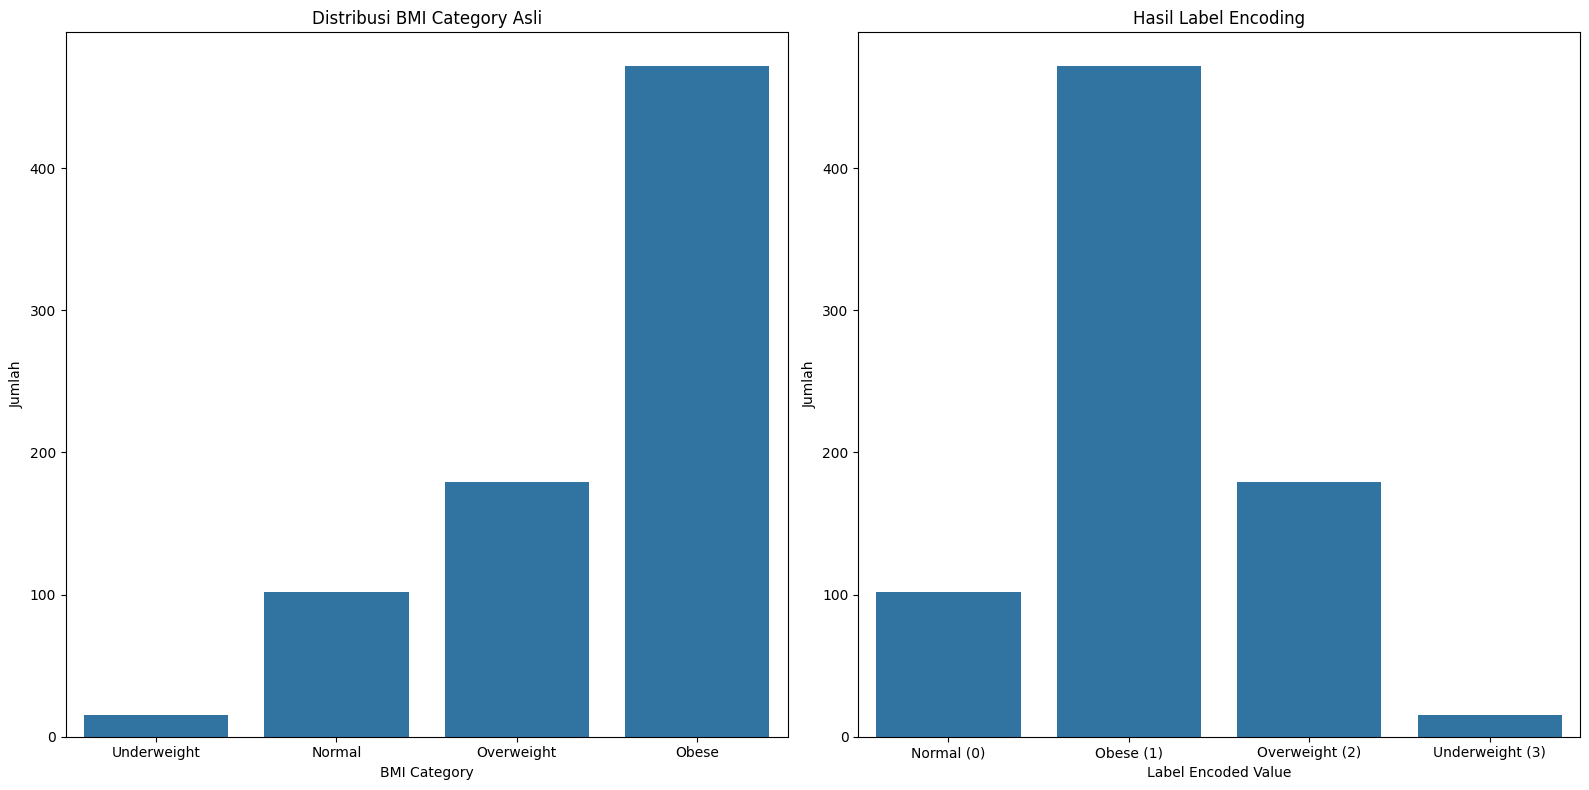

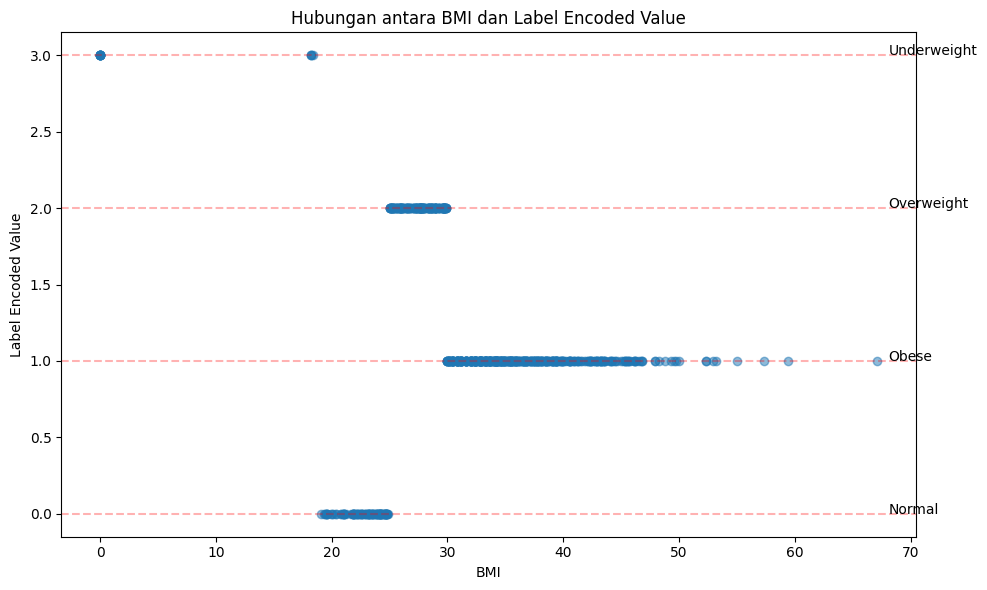

In [ ]:
le = LabelEncoder()
df_label = df.copy()
df_label['BMI_Category_Label'] = le.fit_transform(df['BMI_Category'])

# Visualisasi hasil
plt.figure(figsize=(16, 8))

# Plot distribusi kategori asli
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='BMI_Category', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Distribusi BMI Category Asli')
plt.xlabel('BMI Category')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

# Plot distribusi hasil label encoding
plt.subplot(1, 2, 2)
mapping = {i: category for i, category in enumerate(le.classes_)}
ax = sns.countplot(data=df_label, x='BMI_Category_Label')
plt.title('Hasil Label Encoding')
plt.xlabel('Label Encoded Value')
plt.ylabel('Jumlah')
plt.xticks(ticks=range(len(mapping)), labels=[f"{v} ({k})" for k, v in mapping.items()])

plt.tight_layout()
plt.show()

# Visualisasi scatter plot untuk melihat hubungan antara BMI dan label encoded value
plt.figure(figsize=(10, 6))
plt.scatter(df_label['BMI'], df_label['BMI_Category_Label'], alpha=0.5)
plt.title('Hubungan antara BMI dan Label Encoded Value')
plt.xlabel('BMI')
plt.ylabel('Label Encoded Value')
for i, category in mapping.items():
    plt.axhline(y=i, color='r', linestyle='--', alpha=0.3)
    plt.text(df_label['BMI'].max() + 1, i, category)
plt.tight_layout()
plt.show()

## Implementasi Ordinal Encoding

In [ ]:
df_ordinal = df.copy()
oe = OrdinalEncoder(categories=[['Underweight', 'Normal', 'Overweight', 'Obese']])
df_ordinal['BMI_Category_Ordinal'] = oe.fit_transform(df[['BMI_Category']])
print("\nOrdinal Encoding Mapping:")
print("Underweight -> 0")
print("Normal -> 1")
print("Overweight -> 2")
print("Obese -> 3")
print("\nHasil Ordinal Encoding:")
print(df_ordinal[['Pregnancies', 'BMI', 'BMI_Category', 'BMI_Category_Ordinal']].head())



Ordinal Encoding Mapping:
Underweight -> 0
Normal -> 1
Overweight -> 2
Obese -> 3

Hasil Ordinal Encoding:
   Pregnancies   BMI BMI_Category  BMI_Category_Ordinal
0            6  33.6        Obese                   3.0
1            1  26.6   Overweight                   2.0
2            8  23.3       Normal                   1.0
3            1  28.1   Overweight                   2.0
4            0  43.1        Obese                   3.0


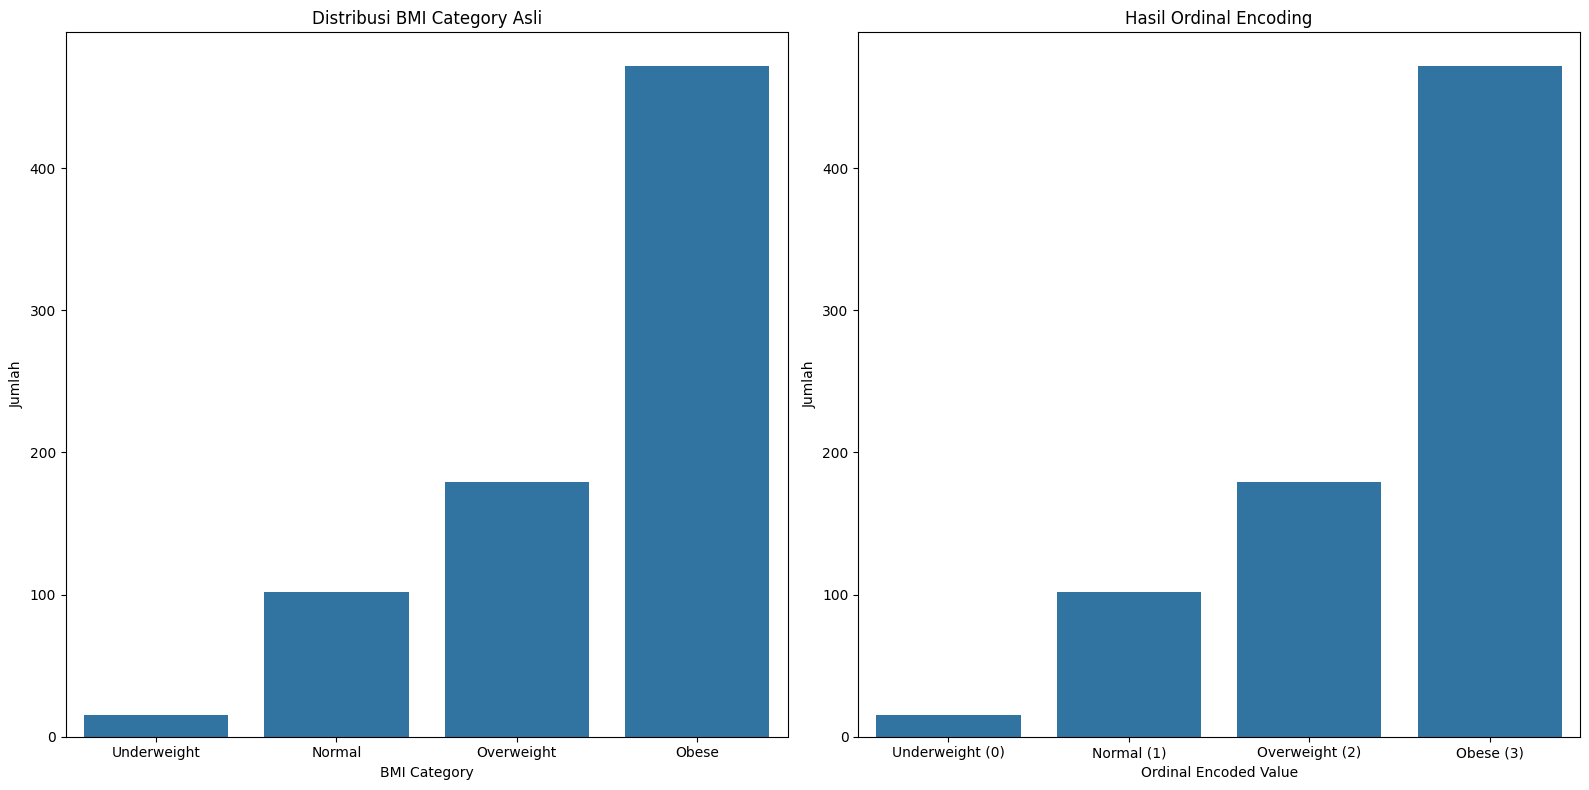

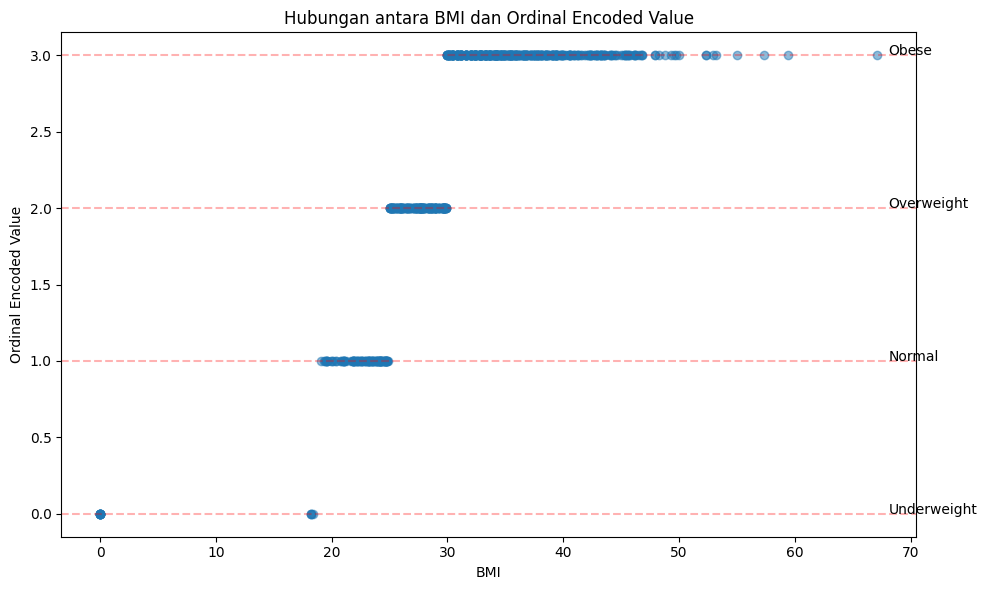

In [ ]:
# Ordinal Encoding untuk 'BMI_Category'
categories = [['Underweight', 'Normal', 'Overweight', 'Obese']]
oe = OrdinalEncoder(categories=categories)
df_ordinal = df.copy()
df_ordinal['BMI_Category_Ordinal'] = oe.fit_transform(df[['BMI_Category']])

# Visualisasi hasil
plt.figure(figsize=(16, 8))

# Plot distribusi kategori asli
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='BMI_Category', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Distribusi BMI Category Asli')
plt.xlabel('BMI Category')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

# Plot distribusi hasil ordinal encoding
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df_ordinal, x='BMI_Category_Ordinal')
plt.title('Hasil Ordinal Encoding')
plt.xlabel('Ordinal Encoded Value')
plt.ylabel('Jumlah')
plt.xticks(ticks=range(4), labels=['Underweight (0)', 'Normal (1)', 'Overweight (2)', 'Obese (3)'])

plt.tight_layout()
plt.show()

# Visualisasi scatter plot untuk melihat hubungan antara BMI dan ordinal encoded value
plt.figure(figsize=(10, 6))
plt.scatter(df_ordinal['BMI'], df_ordinal['BMI_Category_Ordinal'], alpha=0.5)
plt.title('Hubungan antara BMI dan Ordinal Encoded Value')
plt.xlabel('BMI')
plt.ylabel('Ordinal Encoded Value')
categories_list = categories[0]
for i, category in enumerate(categories_list):
    plt.axhline(y=i, color='r', linestyle='--', alpha=0.3)
    plt.text(df_ordinal['BMI'].max() + 1, i, category)
plt.tight_layout()
plt.show()


## Implementasi Target Encoding

In [ ]:
df_target = df.copy()
bmi_categories = df['BMI_Category'].unique()
target_means = {}
for category in bmi_categories:
    target_means[category] = df[df['BMI_Category'] == category]['Outcome'].mean()
df_target['BMI_Category_Target'] = df['BMI_Category'].map(target_means)
print("\nTarget Encoding Mapping:")
for category, mean in target_means.items():
    print(f"{category} -> {mean:.4f}")
print("\nHasil Target Encoding:")
print(df_target[['Pregnancies', 'BMI', 'BMI_Category', 'BMI_Category_Target']].head())



Target Encoding Mapping:
Obese -> 0.4640
Overweight -> 0.2235
Normal -> 0.0686
Underweight -> 0.1333

Hasil Target Encoding:
   Pregnancies   BMI BMI_Category  BMI_Category_Target
0            6  33.6        Obese             0.463983
1            1  26.6   Overweight             0.223464
2            8  23.3       Normal             0.068627
3            1  28.1   Overweight             0.223464
4            0  43.1        Obese             0.463983


<ipython-input-103-1557e123129a>:37: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_target[df_target['BMI_Category'] == category]['BMI_Category_Target'],


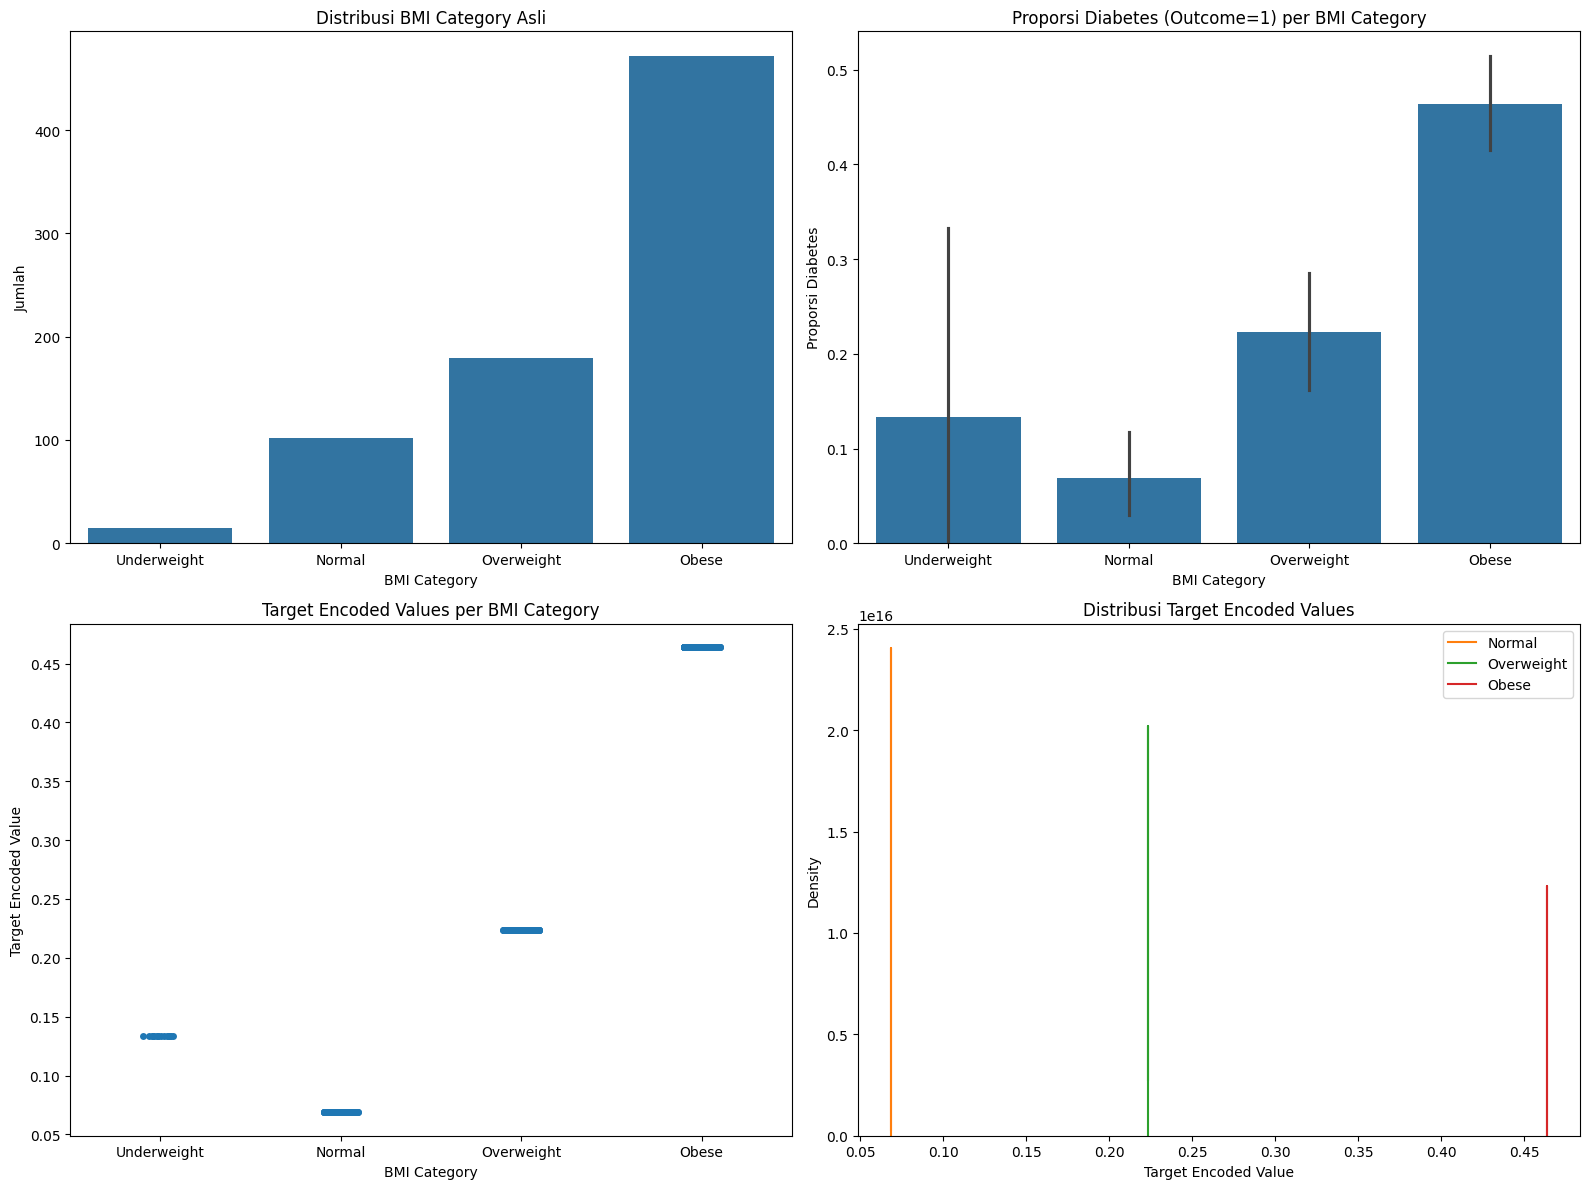

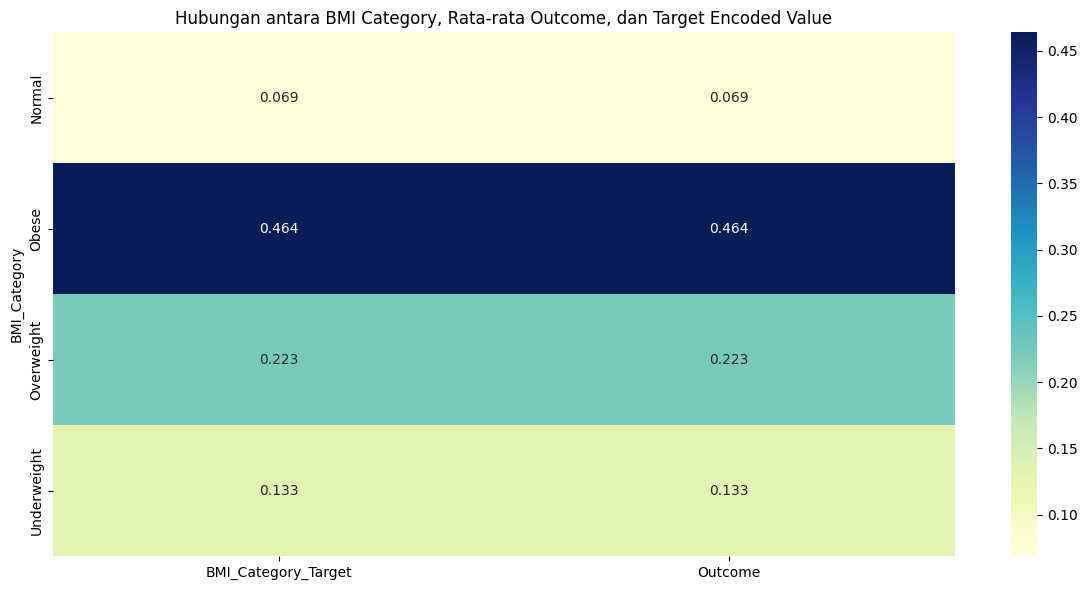

In [ ]:
# Target Encoding untuk 'BMI_Category'
df_target = df.copy()
target_means = df.groupby('BMI_Category')['Outcome'].mean()
df_target['BMI_Category_Target'] = df_target['BMI_Category'].map(target_means)

# Visualisasi hasil
plt.figure(figsize=(16, 12))

# Plot distribusi kategori asli
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df, x='BMI_Category', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Distribusi BMI Category Asli')
plt.xlabel('BMI Category')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

# Plot distribusi Outcome per kategori
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='BMI_Category', y='Outcome', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Proporsi Diabetes (Outcome=1) per BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Proporsi Diabetes')
plt.xticks(rotation=0)

# Plot hasil target encoding sebagai scatter plot
plt.subplot(2, 2, 3)
sns.stripplot(data=df_target, x='BMI_Category', y='BMI_Category_Target',
              order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Target Encoded Values per BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Target Encoded Value')
plt.xticks(rotation=0)

# Plot distribusi target encoded values
plt.subplot(2, 2, 4)
for category in ['Underweight', 'Normal', 'Overweight', 'Obese']:
    sns.kdeplot(df_target[df_target['BMI_Category'] == category]['BMI_Category_Target'],
                label=category)
plt.title('Distribusi Target Encoded Values')
plt.xlabel('Target Encoded Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Visualisasi heatmap untuk melihat hubungan antara BMI_Category, Outcome, dan Target Encoded Value
plt.figure(figsize=(12, 6))
pivot_data = df_target.pivot_table(index='BMI_Category', values=['Outcome', 'BMI_Category_Target'])
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Hubungan antara BMI Category, Rata-rata Outcome, dan Target Encoded Value')
plt.tight_layout()
plt.show()


## Menggabungkan semua hasil encoding

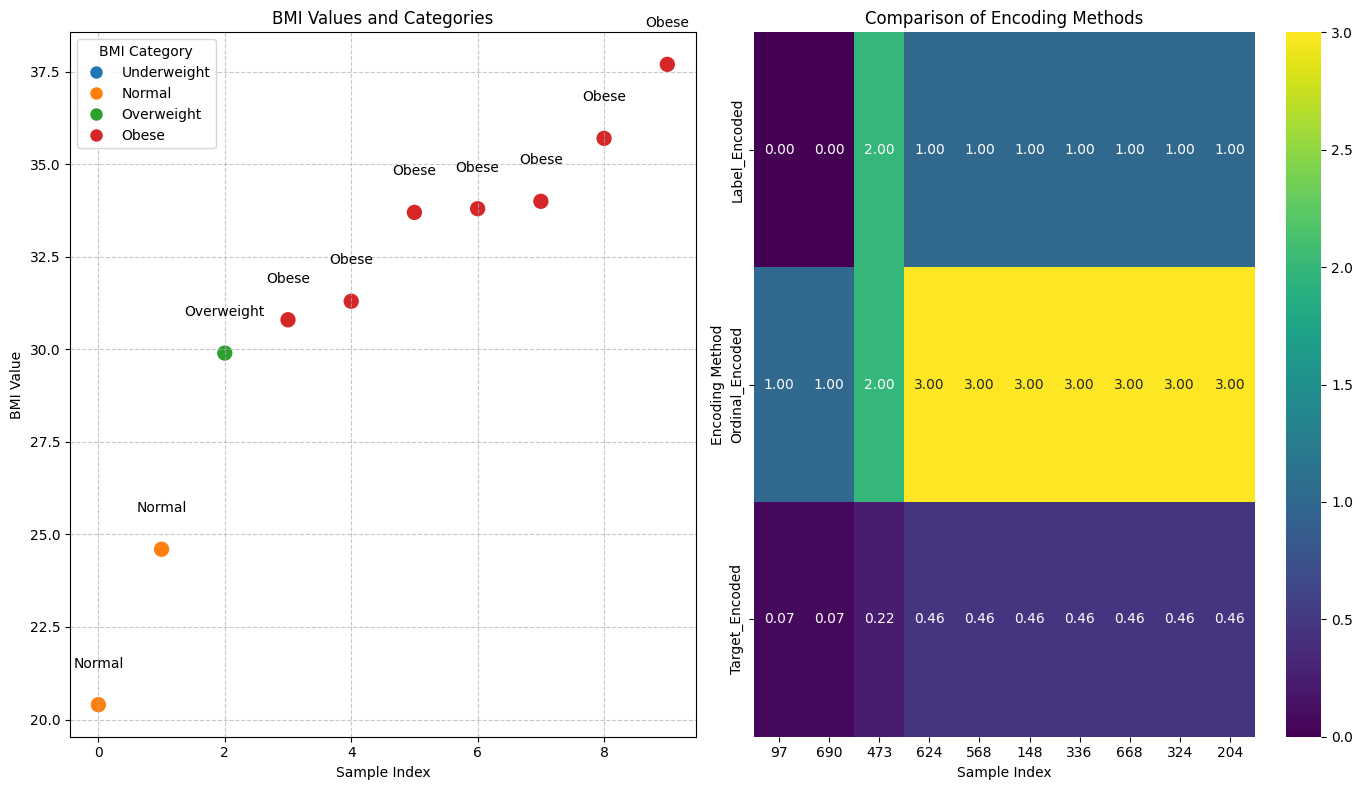

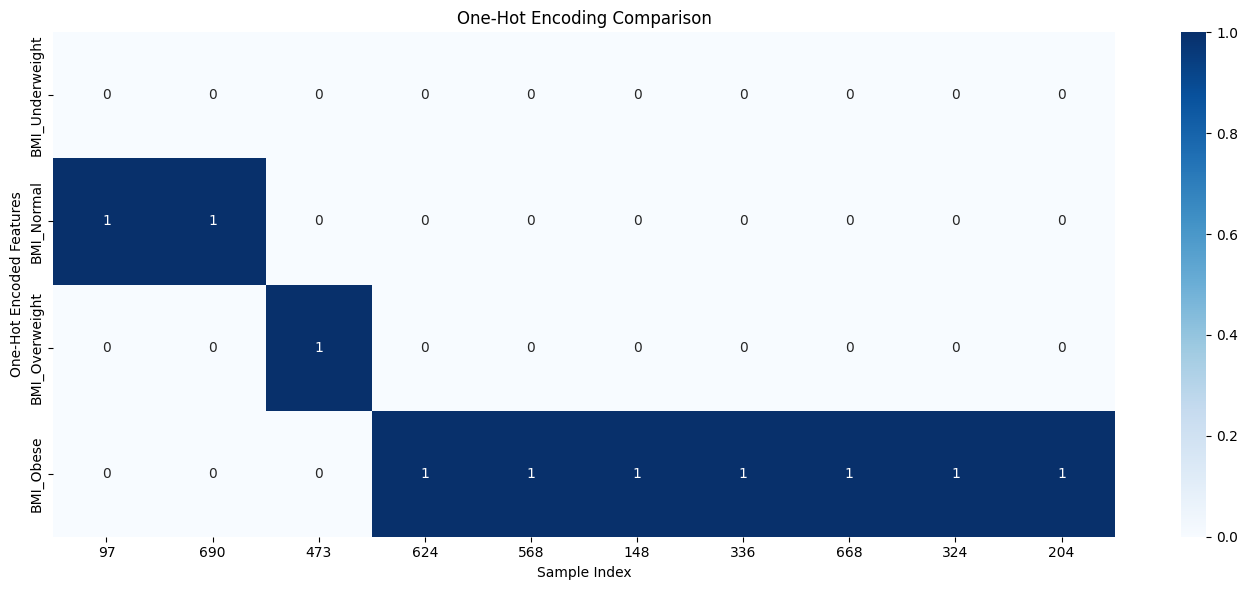

In [ ]:
df_combined = df.copy()
df_combined['Label_Encoded'] = df_label['BMI_Category_Label']
df_combined['Ordinal_Encoded'] = df_ordinal['BMI_Category_Ordinal']
df_combined['Target_Encoded'] = df_target['BMI_Category_Target']
df_combined = pd.concat([df_combined,
                         df_onehot[['BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']]],
                        axis=1)

# Visualisasi perbandingan hasil encoding untuk beberapa sampel
plt.figure(figsize=(14, 8))
sample_size = 10
sampled_df = df_combined.sample(sample_size, random_state=42)
sampled_df = sampled_df.sort_values('BMI')

# Visualisasi nilai asli BMI dan Category
plt.subplot(1, 2, 1)
categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
category_colors = {category: color for category, color in zip(categories, colors)}
plt.scatter(range(sample_size), sampled_df['BMI'],
            c=[category_colors[cat] for cat in sampled_df['BMI_Category']], s=100)
for i, (_, row) in enumerate(sampled_df.iterrows()):
    plt.text(i, row['BMI'] + 1, row['BMI_Category'], ha='center')
plt.title('BMI Values and Categories')
plt.xlabel('Sample Index')
plt.ylabel('BMI Value')
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                          label=category, markersize=10)
                   for category, color in category_colors.items()]
plt.legend(handles=legend_elements, title='BMI Category')

# Visualisasi hasil berbagai encoding
plt.subplot(1, 2, 2)
encoding_data = sampled_df[['Label_Encoded', 'Ordinal_Encoded', 'Target_Encoded']].T
sns.heatmap(encoding_data, cmap='viridis', annot=True, fmt='.2f')
plt.title('Comparison of Encoding Methods')
plt.xlabel('Sample Index')
plt.ylabel('Encoding Method')

plt.tight_layout()
plt.show()

# Visualisasi One-Hot Encoding untuk sampel yang sama
plt.figure(figsize=(14, 6))
onehot_data = sampled_df[['BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']].T
sns.heatmap(onehot_data, cmap='Blues', annot=True, fmt='g')
plt.title('One-Hot Encoding Comparison')
plt.xlabel('Sample Index')
plt.ylabel('One-Hot Encoded Features')
plt.tight_layout()
plt.show()


## Membuat subset data untuk visualisasi

<Figure size 1200x1000 with 0 Axes>

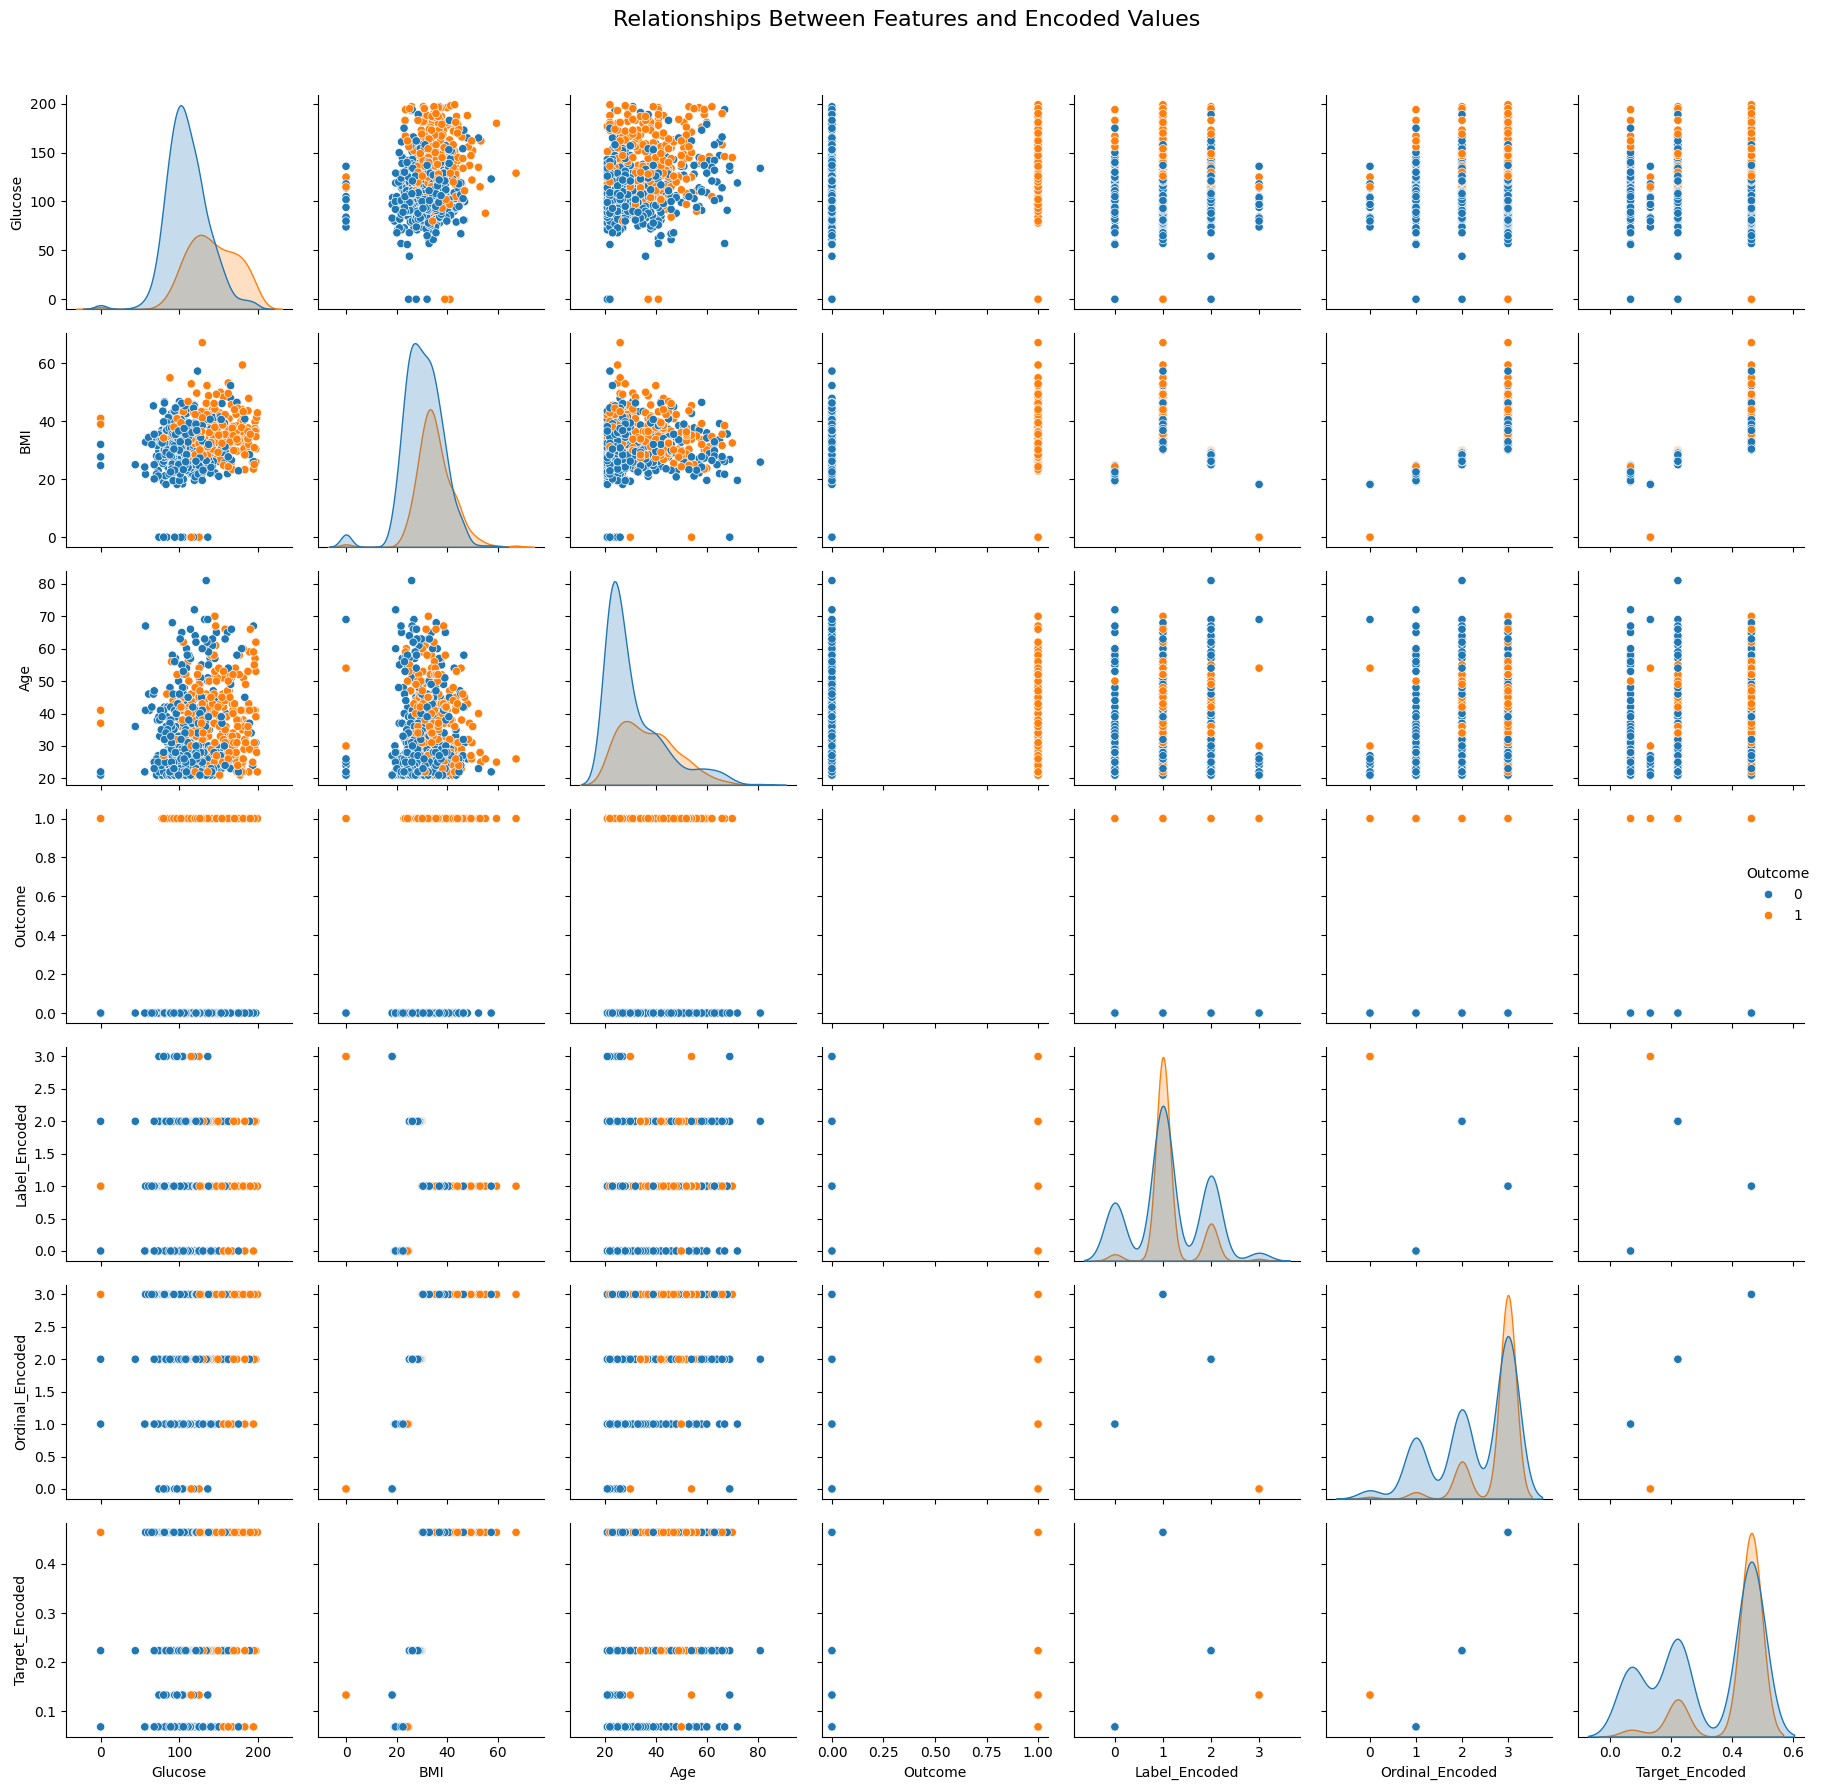

In [ ]:
subset_features = ['Glucose', 'BMI', 'Age', 'Outcome',
                   'Label_Encoded', 'Ordinal_Encoded', 'Target_Encoded']
subset_df = df_combined[subset_features].copy()

# Visualisasi pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(subset_df, hue='Outcome', vars=subset_features[:-1] + ['Target_Encoded'])
plt.suptitle('Relationships Between Features and Encoded Values', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()
